# ISYE 6644 - Simulation

## Details

**Professor:**  Dr. David Goldsman 

[Textbook Optional](https://www2.isye.gatech.edu/~sman/courses/6739/A-First-Course-in-Probability-and-Statistics-Student-Version-v210818.pdf)

[Course Notes](https://www2.isye.gatech.edu/~sman/courses/6739/)


**Description**   
This course covers modeling of discrete-event dynamic systems and introduces methods for using these models to solve engineering design and analysis problems.  It'll be a mix of probability, statistics, computer science, and programming.

We'll work hard and play hard on a number of interesting topics.  Everything from a Prob/Stats bootcamp to the generation of random variables on a computer to the analysis of outputs from a simulation.    I tend to assign a lot of homework, but I promise that it's all reasonable.  We'll have two impossibly difficult midterms and a final, but you'll survive.

By the time you're done with this course (if you are still walking), you'll be able to model, simulate, and analyze a variety of real-world processes.  Think the line at Disneyworld, or a complicated manufacturing system, or even stock options!



## W1Mod1 - Intro


### Introduction

Objectives:  
- Identify simulation models and recognize studies
- Illustrate organization of simulation languages including Modeling with Arena ( a comprehensive simulation package )

**Models**   
Are high level representations of the operation of a real world process or system.
- Can be discrete (vs Continuous)
- Stochastic (vs Deterministic)
- Dynamic (vs Static)

How to solve a model?   
- Analytical methods (exact and/or symbolic)
- Numerical methods
- Simulation

Simulation is good to describe / analyze real or conceptual system behaviour. Ask "what-if" type questions. Aid in system design and optimization. It is most popular in Manufacturing industry. Used calculate the movement of parts of interation of system components; Evaluate part flow thru a system; Examine conflicting demand for resources; etc etc. Basically any system that looks at throughput (Queueing Problems). Disadvantages include: Not easy, Time consuming and costly, 

Let's now take a quick look at some applications of simulation.   
These include  
- call centres, fast food drive thrus, 
- as well manufacturing plants such as an automobile centre or other production facility, 
- supply chains   
- Health: Hospital room allocations, Disease propogation
- Time: monitoring time series
- Surveillance Monitoring such as drugs administered in a hospital setting

### Examples

Let's now look at some examples  

Q1: How many people need to be a room such that there is at least two with the same birthday?   
- You could take some random guesses such as 9, 23, 42, or 183! 
- It turns out that only 23 people are needed! On average at least 


Q2: Simulating Pi (3.14159...)
- draw a unit square, and inside it draw a circle ( fully inside )
- now throw a dart at the square, and keep count,
- if inside the circle it counts as a success, 
- as the number of throws grows the proportion 


Q3: Integration using simulation
- Recall that an integral of a function can be approximated by a series of rectangles along the x axis.
- their height is determined by the function value at the centre
- now sum the area of all the rectangles
- as these rectangle get thinner and thinner 
- you'll converge to the integral

<img src="images/w101.png" width="350"/>

### Randomness  

Problem: 
- Need random variables (RVs) to run the simulation, (e.g. interarrival times, service times)    

Solutions  
Generate uniform(0,1) pseudo-random numbers (PRNs)
- using a deterministice algorithm
- Not really random but appear to be ( to a human at least )

Generate other RVs
- Start with unif(0,1)
- Apply transformations to get to any other type of random variable

Example: Linear Congruential Generator  
- Choose an integer "seed"    
- Set X(i) = a * X(i-1) mod m     
- where a & m are carefully chosen constants and mod is the modulus function
- Set the i'th PRN as U(i) = X(i)/m
- (Hint: m should a big prime number)

### Simulated Output

Random input to a simulator means the output will also be somewhat random. 
- almost never normally distributed
- Not identically distributed 
- Not independent

All this means that traditional statistical methods will fail. 

Terminating Simulations  
- Usually analyzed via independent replications
- Make indep runs of the simulation under identical conditions
- Sample means from each replication are assumed to be i.i.d.

Steady-State Simulations
- First deal with initialization (start-up) bias
- Usually warm-up simulation before collecting data. Failure to do so can ruin future analysis
- For sampling there is 
    - Batch Means
    - Overlapping Batch Means / Spectral Analysis
    - Standardized Time Series
    - Regeneration

Batch means is the most popular. 
- first do a warm up simulation, 
- then you make one really long run
- then chop the remaining observations into contiguous batches
- then sample means from each batch are approximately i.i.d. normal

## W2Mod2 - Math&Stats Review


Review of basic statistics, probability, and calculus. That will be needed later on.


### Calc - Derivatives

Suppose f(x) is a function that maps values of x from a certain domain X to a range Y, which we denote $f:X \to Y $    

Then   
$f(x)$ is continuous if for any $x_0$ and $x \in X$ we have $\lim_{x \to x_0} f(x)$
- where "lim" is assumed to exist for all $x \in X$
    
if $f(x)$ is continuous then the deriviative is given by 
- $\frac{d}{dx} f(x) = f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

Some handy derivatives you should recall  
- $\frac{d}{dx} x^k = kx^{k-1}$
- $\frac{d}{dx} e^x = e^x$ 
- $\frac{d}{dx} sin(x) = cos(x)$
- $\frac{d}{dx} cos(x) = -sin(x)$
- $\frac{d}{dx} ln(x) = \frac{1}{x}$
- $\frac{d}{dx} arctan(x) = \frac{1}{(1+x^2)}$


Some handy properties/shortcuts  
<img src="images/w201.png" width="350"/>


The second derivative $f''(x) = \frac{d}{dx}f'(x)$ and is the slope of the slope. In many examples f is thought of as the position, making f' the velocity, and f'' is the acceleration.

This has some super handy properties: 
- the min/max of f(x) can only occur when the slope of f(x) is zero, i.e. only when f'(x)=0, say at $x=x_0$
- In some situations this can be thought of as a point of inflection
    - this is useful when you need to find the roots of $f(x)$, or when trying to find a min/max value in an optimization 

Methods for finding zero's(basic functions):
1. Analytical 
    - given a function f(x) 
    - we set f'(x)=0 and solve for x
2. Bisection (IVT - Intermediate Value Theorem)
    - given f(x) and x1 and x2, with x1!=x2, where f(x1)>0 and f(x2)<0
    - then we bisect the interval (x1,x2) at a point x3 and comute f(x3)
    - we repeat this process for say (x1,x3) and continue the process 
    - until we reach convergence or reach a threshold    
3. Newton's method (for well behaved derivatives)
    - given f(x) and some guess (xi)
    - choose x_i+1 = x_i - g(x_i)/g'(x_i)
    - repeat until convergence is achieved


### Calc - Integrals

**Fundamental Theorem of Calculus**  
If f(x) is continuous, then the area under the curve for $x \in [a,b]$ is denoted and given by the definite integral.
$$\int_a^b f(x) dx = F(x)\bigg\rvert_a^b = F(b)-F(a)$$


Some Handy reminders   
- $\int x^k dx = \frac{x^{k+1}}{k+1}+C, k \ne -1$
- $\int \frac{1}{x} dx = ln|x| + C $
- $\int e^x dx = e^x + C$
- $\int cos(x) dx = sin(x) + C$
- $\int \frac{1}{1+x^2} dx = arctan(x) + C$

Some Handy properties include 
<img src="images/w202.png" width="350"/>
<img src="images/w203.png" width="350"/>


Taylor Series Expansion of f(x) about a point a is given by   
$$f(x)=\sum_{k=0}^{\infty} \frac{f^{(k)}(a)(x-a)^k}{k!}$$


Maclaurin series is just Taylor expanded around a=0
- $sin(x) = \sum_{k=0}^{\infty} \frac{(-1)^{k+1} x^{2k+1}}{(2k+1)!} $
- $cos(x) = \sum_{k=0}^{\infty} \frac{(-1)^{k} x^{2k}}{(2k)!} $
- $e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$

Finally recall L'Hopitals rule  
<img src="images/w204.png" width="350"/>

### Calc - Numerical Integration

Used when a closed form of an integral doesn't exist. (ie no analytical solution can be found)

M1 - Riemann Summation
- Approximation of an integral of a function f(x) from a to b as the sum of areas of rectangles of width $\triangle x = (b-a)/n$ and height $f(x_i)$
- $\int_a^b f(x) dx \approx \sum_{i=1}^n f(x_i) \triangle x = \frac{b-a}{n} \sum_{i=1}^n f(a + \frac{i(b-a)}{n})$
- will converge to the integral as $n \to \infty$

M2 - Trapezoid 
- Very similar to the Riemann rectangular method, but it uses trapezoids instead.

M3 - Monte Carlo Method
- Let $U_1,U_2,U_3,...,U_n$ be a sequence of Uniform(0,1) random Numbers
- It can be shown that
- $\int_a^b f(x) dx \approx \frac{b-a}{n} \sum_{i=1}^n f(a+(b-a)U_i)$
- and again this becomes an equality as $n \to \infty$




### Probability

Conditional Probability is the probability of an Event A given some previous Event B has occured
- ie P(A|B) 
- Computed as $P(A \cap B)/P(B)$
- Ex Let A={1,2,3} and B={3,4,5,6} then P(A|B) = 1/4

A and B are termed Independent Events if $P(A \cap B) = P(A)P(B)$

A Random Variable X is a function from the sample space $\Omega$ to the real line. ie $X:\Omega \to \mathbb{R}$
- Discrete R.V. is one where the possible values of X are finite
- Continuous R.V. is one where the probability is 0 at every individual point

Well Known R.V.s  
- Uniform(a,b) ( can be discrete or continuous )
- Exponential$(\lambda)$ (continuous)
- Normal($\mu,\sigma^2$) (continuous)

Simulating R.V.s    
Discrete    
- if $U \sim \text{ Unif(0,1) }$ we can generate a Discrete RV by simply using the floor or ceiling function
- ie $X \sim \lceil n U \rceil$
- you can also think of this as just rounding up


**Inverse transform sampling** is a method for generating random numbers from any probability distribution by using its inverse cumulative distribution $F^{−1}(x)$. Recall that the cumulative distribution for a random variable $X$ is 
$ F_X(x)=P (X ≤ x)$. In what follows, we assume that our computer can, on demand, generate independent realizations of a random variable U uniformly distributed on [0,1].


Read More on wikipedia: https://en.wikipedia.org/wiki/Inverse_transform_sampling


Here's a Continuous example
- Suppose X is an exponential RV with $\lambda=2$, 
- thus the pdf is given by $p(x)=\lambda e^{\lambda x} = 2 e^{2x}$
- with inverse of $F_X^{-1}(x) = - \frac{ln(1-x)}{2}$ ( just solve )


A small example using R  
```R
num.samples <-  1000
U           <-  runif(num.samples)
X           <- -log(1-U)/2

# plot
hist(X, freq=F, xlab='X', main='Generating Exponential R.V.')
curve(dexp(x, rate=2) , 0, 3, lwd=2, xlab = "", ylab = "", add = T)
```


### Expectations

Definition of the expected value  

$
E[X] = 
\begin{cases} 
  \sum_x x f(x)  \\
  \int_x x f(x)
\end{cases}
= \int_{\mathbb{R}} dF(X) \text{ we will use this as an abbreviation for the piecewise function }
$

**Example**, Exponential($\lambda$)      
$
f(x) = 
\begin{cases} 
  \lambda e^{-\lambda x} & \text{ if x > 0 }  \\
  0 & \text{ otherwise }
\end{cases}
$

Integration by parts plus l'Hopital's Rule yields   
$E[X] = \int_R x f(x) dx = \int_0^{\infty} x \lambda e^{-\lambda x} dx = \frac{1}{\lambda} $


**LOTUS: Law Of the Unconscious Statistician**   
Suppose that h(X) is some function of the R.V. X,then    
$
E[h(X)] = 
\begin{cases} 
  \sum_x h(x) f(x) & \text{ X is discrete }  \\
  \int_x h(x) f(x) & \text{ X is continuous }
\end{cases}
= \int_{\mathbb{R}} h(x) dF(X) 
$

Example   
```
Suppose X is a discrete R.V. with the following distribution
  x     2    3    4
f(x)  0.3  0.6  0.1

and let h(x) = x^3
Then 
E[X^3] = 8(0.3)+27(0.6)+64(0.1) = 25
```

Similarly for $X \sim Uniform(0,2)$ we have $E[X^n] = \frac{2^n}{(n+1)}$

**Moment Generating Functions**   
- N'th raw moment is given by $E[X^n]$ 
    - Expected value is the 1st moment)  
- N'th central moment is given by $E[(X-E[X])^n]$ 
    - Variance is the 2nd central moment
    - $Var(X)=E[(X-E[X])^2]=E[X^2]-(E[X])^2$

Examples  
1. For $X \sim Bernoulli(p)$
    - $E[X]=p$
    - $Var[X]=p(1-p)$
2. for $X \sim Exp(\lambda)$    
    - $E[X^n] = \int_0^{\infty} x^n \lambda e^{-\lambda x} dx = n! / \lambda^n$
    - $V[X]=\frac{2}{\lambda^2} - (\frac{1}{\lambda^1})^2 = 1/\lambda^2$

**Theorem** (proofs left as an exercise)       
- $E[aX+b]=aE[X]+b$
- $Var[aX+b]=a^2 Var(X)$


**Definition** Moment Generating Functions     
$M_X(t)=E[e^{tX}]$ is the moment generating function (mgf) of the R.V. X   
(Note that $M_X(t)$ is a function of t only!!)

Examples   
- for $X \sim Bern(p)$ we have $M_X(t) = \sum_x e^{tx} f(x) = e^{t \cdot 1} p + e^{t \cdot 0} q = pe^t+q$
- for $X \sim Exp(\lambda)$ we have $M_X(t) = \int e^{tx} f(x) = \lambda \int_0^{\infty} e^{(t-\lambda)x} dx = \lambda / (\lambda - t)$ when $\lambda > t$


### Functions of an R.V.

Problem: Suppose we have an R.V. X with pdf f(x). However, we also have that Y = h(X). Then what is the pdf of Y?

Examples ( solution to be shown later )
- if $X \sim Normal(0,1)$ then $Y=X^2 \sim \chi^2(1)$
- if $U \sim Uniform(0,1)$ then $Y=-(1/\lambda)ln(U) \sim Exp(\lambda) $


Discrete Example:  
```
  x             0    1    2 
f(x)          1/4  1/2  1/4

y = x^3 - x     0    0    6
```
This implies that g(0) = P(Y=0) = P(X=0 or 1) = 3/4 and g(6) = P(Y=6) = 1/4.
```
g(y) = 3/4  if y = 0 
     = 1/4  if y = 6
```

Suppose X has pdf $f(x)=|x|,-1 \le x \le 1$, and $Y=X^2$  
Then   
$
\begin{split}
G(y) & = P(Y \le y) \\
& = P(X^2 \le y) \\
& = P(-\sqrt{y} \le X \le \sqrt{y}) \\
& = \int_{-\sqrt{y}}^{\sqrt{y}} |x| dx \\
& = y \text{ for } 0 \le y \le 1
\end{split}
$   
Then the pdf of Y is $g(y)=G'(y)=1$ so $Y \sim Uniform(0,1)$


**Inverse Transform Theorem**    
Suppose X is a continous random variable having cdf F(x). Then $F(X)\sim Uniform(0,1)$   
$\begin{split}
P(Y \le y) & = P(F(X) \le y)  \\
& = P(X \le F^{-1}(y))  \\
& = F(F^{-1}(y)) \\
& = y
\end{split}$    
This may seem trivial now but it is an extremely important result needed when we want to generate R.V.s during a simulation

**Example** (Generating exponential RVs)      
Suppose $X \sim Exp(\lambda)$, with cdf $F(x)=1-e^{-\lambda x}$ for x > 0    

Inverse Transform Theorem implies that $F(X)=1-e^{-\lambda x} \sim Uniform(0,1)$    
So let $U = Unif(0,1)$ and set $F(X)=U$.    
Then we have $X=\frac{-1}{\lambda} ln(1-U) \sim Exp(\lambda)$    

For instance, if $\lambda=2, U=0.27$ then X = 0.157 is an Exp(2) instance.


**Example**     
Suppose X has the Weibull distribution with cdf : $\large F(x)= 1 - e^{-(\lambda x)^\beta}, x > 0$    

Then solving for x we find that $\large X = \frac{1}{\lambda} [-ln(1-U)]^{1/\beta} $    

**Bonus Theorem**    
Here's another way to get the pdf of $Y=h(X)$ for some continuous function $h(\cdot)$      
The cdf of Y is $\large F_Y(y) = P(Y \le y) = P(h(X) \le y) = P(X \le h^{-1}(y))$      

By the chain rule ( and since a pdf must be $\ge 0$ ), the pdf of Y is    
$\large f_Y(y) = \frac{d}{dy} F_Y(y) = f_X(h^{-1}(y)) |\frac{d}{dy} h^{-1}(y)| $



### Joint PDFs 

Consider 2 RVs interacting together.   

Then the joint cdf of X and Y is    
$F(x,y)=P(X \lt x, Y \lt y) \text{ for all x,y } $    

**Remark:** The _marginal cdf_ of X is $F_X(x) = F(x,\infty)$. We use the X subscript to remind us that it's just the cdf of X all by itself.) Similarly, the _marginal cdf_ of Y is $F_Y(y) = F(\infty,y)$

**Definition:** If X and Y are discrete then the joint pmf is $f(x,y) = P(X=x,Y=y) = \sum_x \sum_y f(x,y) = 1$       
**Remark:**   
- The _marginal pmf_ of X is $f_X(x) = P(X = x) = \sum_y f(x,y)$     
- The _marginal pmf_ of Y is $f_Y(y) = P(Y = y) = \sum_x f(x,y)$     

For the continuous case change the summations to integrals and you're good to go.

**Example**  
Consider $f(x,y) = \frac{21}{4} x^2 y, x^2 \le y \le 1$    

Then the marginals pdf's are:    
$\large f_X(x) = \int_{x^2}^1  \frac{21}{4} x^2 y dy = \frac{21}{8} x^2 ( 1 - x^4 ), -1 \le y \le 1 $


**Independence**  
X and Y are _independent_ RV's if $f(x,y) = f_X(x) f_Y(y), \forall x,y$

Example:    
Let $f(x,y)=cxy$ for $0 \le x \le 2, 0 \le y \le 3$ Then X,Y are independent     

Let $f(x,y)=\frac{21}{4} x^2 y \text{ for } x^2 \le y \le 1$ Then X,Y are not independent. 
Here the sticking point is the interval boundary for y depends on x.

Let $f(x,y) = \frac{c}{(x+y)} \text{ for } 1 \le x \le 2, 1 \le y \le 3$
Here the issue is the function itself, which cannot be factored into 2 multiplicative functions.


**Theorem:** X and Y are independent if you can write their joint pdf as $f(x,y)=a(x)b(x)$


### Conditional Expectations


**Conditionality**    
The conditional pdf of y given X=x is $f(y|x) = f(x,y)/f_X(x)$ ( assuming f_X(x) > 0)    
Similarly the conditional pdf of x given Y=y is $f(x|Y=y) = f(x,y)/f_Y(y)$ ( assuming f_Y(y) > 0)    


**Conditional Expectation:**    
$
E[Y|X=x] = 
\begin{cases} 
  \sum_y y f(y|x) & \text{ discrete }  \\
  \int_R y f(y|x) dy & \text{ continuous }
\end{cases}
$

Example:     
Let $f(x,y)=\frac{21}{4} x^2 y \text{ for } x^2 \le y \le 1$     
Then $E[Y|x] = \int_R y f(y|x) dy = \int_{x^2}^1 \frac{2y^2}{1-x^4} dy = \frac{2}{3} \frac{1-x^6}{1-x^4}$     

**Double Expectations**  
$\large E[E(Y|X)]=E[Y]$

Proof   
$
\begin{split}
E[E(Y|X)] 
& = \int_R E(Y|x) f_X(x) dx & \text{ by LOTUS}    \\
& = \int_R \left( \int_R y f(y|x) dy \right) f_X(x) dx   \\
& = \int_R y \int_R f(x,y) dx dy \\
& = y f_Y(y) dy 
& = E[Y]
\end{split}
$

Computing Probabilities using Conditioning    
Let A be some event, and define the RV Y = 1 if A occurs; and Y = 0 otherwise.    
Then $E[Y] = \sum_y y f_Y(y) = P(Y=1) = P(A) $    

Similarly, for any RV X, we have     
$E[Y|X=x] = \sum_y y f_Y(y|x) = P(Y=1|X=x) = P(A|X=x)$     

Thus   
$
\begin{split}
P(A) & = E[Y]       \\
& = E[E(Y|X)]       \\
& = \int_R E[Y|X=x] dF_X(x) \\
& = \int_R E[A|X=x] dF_X(x) \\
\end{split}
$

Example: Exponential Distribution    
If $X \sim Exp(\mu)$ and $Y \sim Exp(\lambda)$, are independent RVs, then   
$
\begin{split}
P(Y < X) & = \int_R P(Y < x) f_X(x) dx  \\
& = \int_0^{\infty} (1-e^{-\lambda x}) \mu e^{-\mu x}  \\
& = \frac{\lambda}{\lambda + \mu}  \\
\end{split}
$


### Correlation & Covariance

**Lotus in 2 Dimensions**    
$
E[h(X,Y)] = 
\begin{cases}
\sum_x \sum_y h(x,y) f(x,y) \text{ if (X,Y) is discrete } \\
\int_x \int_y h(x,y) f(x,y) \text{ if (X,Y) is continuous } \\
\end{cases}
$

**Theorem** $ E[X + Y]=E[X] + E[Y] $    
**Theorem** $ Var[X + Y]=V[X] + V[Y] $ True if and only if X,Y are independent       


Suppose $X_1,\cdots,X_n$ form a _random sample_ from f(x) if all the $X_i$'s are independent, and each has the same pdf/pmf.   
We can write that the $X_i$'s are independent and identically distributed, $X_1,\cdots,X_n \overset{iid}\sim f(x)$     

Lemma:     
Let $X_1,\cdots,X_n \overset{iid}\sim f(x)$    
Then the sample mean is given by $\bar{X}_n = \sum X_i/n$     
and the sample variance is given by $Var(\bar{X}_n) = Var(X_i)/n$  

**Covariance**     
$Cov(X,Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]$   
- Observe that $Cov(X,X) = Var(X)$ )   
- REMARK : Cov(X,Y)=0 does not imply that X,Y are independent
    - Ex Let $X \sim Unif(-1,1)$ and $Y = X^2$
    - Then Cov(X,Y) = 0, but clearly Y depends on X

**Theorem** Cov(aX,bY) = abCov(X,Y)     
**Theorem** 
- Regardless of Independence
    - Var(X + Y) = Var(X)+Var(Y)+2Cov(X,Y)
    - Var(X - Y) = Var(X)+Var(Y)-2Cov(X,Y) ( Note that you still add the variances )

**Correlation**    
The _correlation_ between X and Y is defined as    
$\large \rho = \frac{Cov(X,Y)}{ \sqrt{Var(X)Var(Y)} }$     

**Theorem** $-1 \le \rho \le 1$

Example 1   
```
f(x,y)   X=2    X=3   X=4    f(y)
Y = 40   0.0    0.2   0.1    0.3
Y = 50   0.15   0.1   0.05   0.3
Y = 60   0.30   0.0   0.1    0.4
f(x)     0.45   0.3   0.25   1
```
E[X] = 2.8 , E[Y] = 51      
Var(X)=0.66, Var(Y) = 69     
E[XY] = $\sum_x \sum_y xy f(x,y) = 140$

$\rho = -0.415$


**Example 2**     
Consider two assets $S_1,S_2$, with expected returns $\mu_1,\mu_2$, variances $\sigma_1^2,\sigma_2^2, $, and $Cov(S_1,S_2)=\sigma_{12}$. We can then define a portfolio $P = wS_1+(1-w)S_2$ where $w \in [0,1]$. 
Then $E[P]=w\mu_1+(1-w)\mu_2$   
And $Var[P]=w^2 \sigma_1^2 + (1-w)^2 \sigma_2^2 + 2w(1-w)\sigma_{12}$   

Furthermore, if we set $\frac{d}{dw} Var(P) = 0$, we obtain the critical point that (hopefully) minimizes the variance of the portfolio $w = \frac{\sigma_2^2 - \sigma_{12}}{\sigma_1^2 + \sigma_2^2 - 2 \sigma_{12}}$    




### Common Distributions

Bernoulli $X \sim Bernoulli(p)$    
$
f(x) =
\begin{cases}
p \text{ if x = 1} \\
1-p \text{ if x = 0} \\
\end{cases}
$    
- E[X] = p
- Var[X] = p(1-p)
- $M_X(t) = pe^t + q$


**Binomial** $Y \sim Binomial(n,p)$   
If $X_1,\cdots,X_n \overset{iid}\sim Bern(p)$ ( ie N bernoulli trials )    
then $Y = \sum_1^n X_i \sim Bin(n,p)$    

$P(Y = y) = \binom{n}{y} p^y (1-p)^{n-y}$

- E[Y] = np
- Var(Y) = npq
- $M_Y(t) = (pe^t + q)^n$


**Geometric** $X \sim Geometric(p)$   
$f(x) = q^{x-1} p, x=1,2,...$    
- E[X] = 1/p   
- Var(X) = q/p^2   
- $M_X(t) = pe^t / (1-qe^t)$    

**Negative Binomial**    
$
\begin{equation}
NBin(r|p)=\left(\begin{array}{c}
y - 1 \\
r - 1
\end{array}\right)p^{r}(1-p)^{y-r}
\end{equation}
$


**Poisson**    
$\large f(x) = \frac{e^{-\lambda} \lambda^x}{x!}$    
- E[X] = $\lambda$
- Var[X] = $\lambda$
- $M_X(t) = e^{\lambda(e^t - 1)}$

**Continuous Distributions**    

- Uniform $\large X \sim N(a,b)\; f(x)=\frac{1}{b-a} \; \text{ for } a \le x \le b$       
- Exponential $\large X \sim Exp(\lambda) \; f(x)=\lambda e^{-\lambda x}$     
    - NB: Memoryless property $P(X > s+t | X > s) = P(X > t)$    
- Gamma $\large X \sim Gamma(\alpha,\lambda) \; f(x) = \frac{\lambda^{\alpha} x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)}$
    - where $\Gamma(\alpha) = \int_0^{\infty} t^{\alpha-1} e^{-t} dt$
    - Note also 
    - if $X_1,X_2,\cdots,X_n \overset{iid}\sim Exp(\lambda)$      
    - then $Y = \sum_1^n X_i \sim Gamma(n,\lambda)$ ( Which is called an Erlang Distribution )
        - $\large F_Y(y) = (1 - e^{- \lambda y}) \sum_0^{n-1} \frac{(\lambda y)^j}{j!} \; y \ge 0$

The most famous of all - The Normal   
$\large X \sim N(\mu,\sigma^2) \; f(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} exp\left[\frac{-(x-\mu)^2}{2\sigma^2}\right] $       
- $E[X] = \mu $
- $Var(X) = \sigma^2 $
- $M_X(t) = exp(\mu t + (1/2) \sigma^2 t^2)$


Extremely Useful Properties     
**Theorem** If $X_1,X_2$ are independent with $X_i \sim N(\mu_i,\sigma_i^2)$ then $ X_1 + X_2 \sim N(\mu_1 + \mu_2, \sigma_1 + \sigma_2)$

**Corollary (of a previous theorem)**      
- If $X_1,\cdots,X_n \overset{iid}\sim N(\mu,\sigma^2)$     
- Then the sample mean is $\bar{X}_n \sim N(\mu,\sigma^2 / n)$      
    - This is telling us that as n grows large the variance becomes less and less variable

**Central Limit Theorem**     
If $(X_1,X_2,\cdots,X_n) \overset{iid}\sim f(x)$ with mean $\mu$ and variance $\sigma^2$   
Then $\large Z_n = \frac{\sum X_i - n \mu}{\sqrt{n}\sigma} = \frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} \overset{d}\rightarrow N(0,1)$      

In plain language: The cdf of any iid RVs will approach the normal as n increases





### Estimation

**Define:** A _statistic_ is a function of the observations $X_1,\cdots,X_n$ and not dependent on any unknown parameters    
Examples: $\bar{X} = (1/n)\sum_i X_i$ or $S^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2$     


**Define:**  $T(\boldsymbol{X})$ is _unbiased_ for $\theta$ if $E[T(\boldsymbol{X})] = \theta$ 

Example:     
- Suppose $X_1,\cdots,X_n$ are iid anything with mean $\mu$    
- Then $\large E[\bar{X}] = E\left[ \frac{1}{n} \sum X_i \right] = \frac{1}{n} \sum E[X_i] = E[X_i] = \mu$    
- So $\bar{X}$ is always unbiased for $\mu$. That's why $\bar{X}$  is the sample mean
**(Note that $\bar{X}$ being unbiased does not imply 1/$\bar{X}$ is unbiased)**    

Example:   
- Suppose $X_1,\cdots,X_n$ are iid anything with mean $\mu$ and variance $\sigma^2$      
- Then $\large E[S^2] = E\left[ \frac{\sum (X_i - \bar{X})^2}{n-1} \right] = Var(X_i) = \sigma^2$
- Thus $S^2$ is always unbiased for $\sigma^2$, this is why $S^2$ is called the sample variance.


Example:    
Suppose that $X_1,\cdots,X_n \overset{iid}\sim Unif(0,\theta)$    
Consider two estimators: $Y_1 = 2\bar{X}$ and $Y_2 = 2\frac{n+1}{n} max(X_i,1\le i \le n)$    

Since $E[Y_1] = 2 E[\bar{X}] = 2 E[X_i] = \theta$ we can see that $Y_1$ is unbiased for $\theta$
$Y_2$ also unbiased but this is more difficult to determine


Thus   
$
\begin{split}
P(M \le y) & = P(X_1 \le y,\cdots, X_n \le y)       \\
& = \prod_i P(X_i \le y)  \\
& = [P(X_1 \le y)]^2      \\
& = [\int_0^y f_{X_1}]^n  \\
& = [\int_0^y 1/\theta]^n \\
& = (y/\theta)^n
\end{split}
$

Which implies that the pdf of M is $\large f_M(y) = \frac{d}{dy} (y/\theta)^n = \frac{ny^{n-1}}{\theta^n}$     

Now we can compute   
$E[M] = \int_0^{\theta} y f_M(y) dy = \int_0^{\theta} \frac{ny^n}{\theta^n} = \frac{n\theta}{n+1}$    

This tells us that $Y_2$ is also biased, so which is better? It turns out that $Y_2$ is best because it has a lower variance.





## W3Mod3 - Basic Simulation

This module will go through a bunch of simulation examples that you can do by hand.

Topics   
1. Solving a differential equation
2. Monte Carlo integration
3. Making some pi
4. Single-server queue
5. (s,S) inventory system
6. Simulating random variables
7. Spreadsheet simulation

Recall: If $f(x)$ in continuous, then it has the derivative     
$\frac{d}{dx}f(x) = f'(x) = \underset{x\to\infty}\lim \frac{f(x+h) - f(x)}{h} $     
If the limit exists and is well-defined for any given x. Think of the derivative as the slope of the function

So for a small h    
$f'(x) \approx \frac{f(x+h) - f(x)}{h}$ and $f(x+h) \approx f(x) + h f'(x)$     


**Example**    
Suppose you have a differential equation of a population growth model, $f'(x) = 2f(x)$ and suppose we know that $f(0)=10$. Then we can approximate the equation using the above equations

Observe that:   
$f(x+h) \approx f(x) + h f'(x) = f(x) + h(2f(x)) = f(x)(1+2h)$     

Similarly     
$f(x+2h)=f((x+h)+h) \approx (1+2h)f(x+h)\approx(1+2h)^2 f(x)$      
Thus $f(x+ih)\approx(1+2h)^i f(x)$ for i=0,1,2,...    

So for f(0) and h=0.01 we have $f(0.01i) \approx 10(1.02)^i$

```
 0   0.01   0.02   0.03   0.04 ...  0.10
10  10.20  10.40  10.61  10.82 ... 12.19   simulation using above
10  10.20  10.41  10.62  10.83 ... 12.21   this is real value, turns out f(x)=e^2x - we hid this fact to illustrate
```

### Integration   

The function F(x) having derivative f(x) is called the antiderivative. The antiderivative is denoted $F(x) = \int f(x) dx$ and this is also called the indefinite integral of f(x).

**Fundamental Theorem of Calculus**   
If $f(x)$ is continuous, then the area under the curve for $x \in [a,b]$ is denoted and given by the definite integral   
$\large \int_a^b f(x) dx =  F(x) |_a^b = F(b) - F(a)$


### Monte Carlo Integration 

Let the integral $\large I = \int_a^b g(x) dx = (b-a) \int_0^1 g(a+(b-a)u)du$ where u = (x-a)/(b-a)   

Suppose $U_1,U_2,\cdots \overset{iid}\sim Uniform(0,1)$
and we define $I_i = (b-a)g(a+(b-a)U_i)$ for i = 1,2,...,n

We can use the sample average as an estimator for I:   
$\large \bar{I}_n = \frac{1}{n} \sum I_i = \frac{b-a}{n} \sum_1^n g(a+(b-a)U_i)$     
Turns out that, due to the law of large numbers, if an estimator is asymptotically unbiased and it's variance goes to zero, then things are good.

Consider, by LOTUS:   
$ 
\begin{split}
E[\bar{I}_n] & = (b-a)E[g(a+(b-a)U_i)] \\
& = (b-a) \int_R g(a+(b-a)u) f(u) du   \\
& = \text{ where f(u) is the Uniform(0,1) pdf} \\
& = (b-a) \int_0^1 g(a+(b-a)u) du \\
& = I
\end{split}
$
So $\bar{I}_n$ is unbiased for I

Since it can also be shown that Var($\bar{I}_n) = O(1/n)$ the LLN implies that $\bar{I}_n \to I \text{ as } n \to \infty$    
Furthermore, by CLT we also have that $\bar{I}_n \approx N(E[\bar{I}_n], Var[\bar{I}_n]) \sim N(I,Var[I_n]/n)$     
Which suggests a $100(1-\alpha)\%$ confidence interval     
$I \in \bar{I}_n \pm z_{\alpha/2} \sqrt{S_I^2/n}$    
Where $z_{\alpha/2}$ is the usual standard normal quantile    
$S_I^2 = \frac{1}{n-1} \sum_i^n (I_i - \bar{I}_n)^2$    


**Example:**      

Suppose $I = \int_0^1 sin(\pi x) dx$ ( furthermore suppose you don't know the actual answer :))     
Take 4 Uniform(0,1) observations say, 0.79  0.11  0.68  0.31      
Since $I_i = (b-a)g(a+(b-a)U_i) = g(U_i) = sin(\pi U_i)$      
We obtain $\bar{I}_n = \frac{1}{4} \sum I_i = \frac{1}{4} \sum sin(\pi U_i) = 0.656$    
( The real answer is $2/\pi$ which is 0.6366, so it's pretty good )

Furthermore a 95% confidence interval for I is $I \in 0.656 \pm 1.96 \sqrt{0.0557/4}$ and it gets better as n increases!! 




#### MCI - Example 1

Let's try computing pi using Monte Carlo Integration as described above

**Problem** Consider a unit square (with area one). Inscibed in the square is a circle with radius 1/2, thus the area of the circle is $\pi/4$. We will throw darts at the square. We expect that the probability of the dart landing in the circle is $\pi/4$. We will use this to compute $\pi$, or at least estimate it. 

**How** Toss n darts at the square and calculate the proportion $\hat{p}_n$ that land in the circle. Then an estimate for $\pi$ is $\hat{\pi}_n = 4 \hat{p}_n$ which converges to $\pi$ as n becomes large by the Law of large numbers LLN

To simulate a dart toss let $U_1,U_2 \overset{iid}\sim Unif(0,1)$. Then $(U_1,U_2)$ represents the random position of the dart on the unit square.     

A success is when $(U_1 - 1/2)^2 + (U_2 - 1/2)^2 \le 1/4$


**Implementation**
- Choose your favourite spreadsheet
- Column 1 : pick a random number between 0,1 (=RAND()) call this col $U_1$
- Column 2 : pick a random number between 0,1 (=RAND()) call this col $U_2$
- Column 3 : now take the sum of each column less 1/2 and squared
- Column 4 : if Col 3 > 1/4 then 0 else 1
- Drag rows to your hearts content ( number of tosses )

Finally just sum(col4)/count(col4). As the number of tosses, represented by rows, gets larger your estimation will get better. Remember to multiply by 4!! to get $\pi$ since the area of the circle is $\pi/4$





#### MCI - Example 2

**Problem** Customers arrive at a single server queue with iid interarrival times and iid servie times. Customers must wait in a FIFO, first in first out line, if the server is busy. We want to estimate the expected customer wait time, and the expected number of people in the system (queue), as well as the server utilization.   

**Parameters**   
- Interarrival time between customer $i-1$, and $i$ is $I_i$, this is the amount of time between two arrivals
- Customer i's arrival time is $A_i = \sum_1^i I_j$, this is the time the i'th customer arrives/enters the system
- Customer i's service start time is $T_i = max(A_i,D_{i-1})$, where $D_{i-1}$ would be the departure time of the previous customer
- Customer i's waiting time $W_i^Q = T_i - A_i$, no surprise here it's just the length of time it takes for service to start
- Customer i's time in the system $W_i^Q = D_i - A_i$, no surprise it's just their departure time less arrival time
- Customer i's service time is $S_i$
- Customer i's departure time is $D_i = T_i + S_i$

Small example   
```
i | I_i  A_i  | T_i W^Q S_i | D_i
1 |   3    3  |   3   0   7 |  10
2 |   1    4  |  10   6   6 |  16
3 |   2    6  |  16  10   4 |  20
4 |   4   10  |  20  10   6 |  26
5 |   5   15  |  26  11   1 |  27
6 |   5   20  |  27   7   2 |  29

NB sum(W^Q)/6 = 7.33 = Avg wait time for this simulation with six customer
```

The expected number of people at any time in the system is a bit trickier.     
We can integrate over L(t)       
<img src="images/w301.png" width="400"/>

Or more easily is taking the average over $D_i - A_i$    
$
\begin{split}
\bar{L} & = \frac{\text{total person-time in system}}{29}  \\
& = \frac{\sum_1^6 (D_i - A_i)}{29} \\
& = \frac{7+12+14+16+12+9}{29} \\
& = \frac{70}{29} \approx 2.41 \\
\end{split}
$

Finally to get estimated server utilization time we take time busy / total time ie $\hat{\rho} = 26/29$. Note that for the first three units of time the server is free.

What about a LIFO system? Last in first out?? 
We can re-use our example above   
Some columns remain the same $i \; I_i \; A_i \; S_i $
but this time some columns change such as $T_i \; W_i^Q $
```
i | I_i  A_i  | T_i W^Q S_i | D_i
1 |   3    3  |   3   0   7 |  10
2 |   1    4  |  23  19   6 |  29
3 |   2    6  |  17  11   4 |  21
4 |   4   10  |  10   0   6 |  16
5 |   5   15  |  16   1   1 |  17
6 |   5   20  |  21   1   2 |  23

Now sum(W^Q)/6 = 5.33 is the avg wait time
And 58/29 = 2 is the avg number of people in the system
```

Comparing each example suggests that a LIFO is a better approach.



#### MCI - Example 3

Let's now consider a more complex (s,S) inventory system

**Constraints**   
- A Store sells a product at $d per unit
- Store policy says we should have "at least" s units at the start of each day
- if inventory at end of day is less than s then we must order enough to get back to S by the beginning of the next day
- there are various costs in the system

**Parameters**   
Let $I_i$ denote the inventory at the end of day i, and let $Z_i$ denote the order that we place at the end of the day i.   
Clearly   
$Z_i = 
\begin{cases}
S - I_i & \text{ if } I_i < s \\
0 & \text{ otherwise }
\end{cases}
$

Extra Details  
- If an order is placed to the supplier at the end of day i, it costs the store $K+cZ_i$. 
- It costs \$h per unit for the store to hold unsold inventory overnight
- There is also a penalty cost of \$p per unit if demand can't be met   
- No backlogs are allowed   
- Demand on day i is $D_i$

How much money does the store make on day i????
<img src="images/w302.png" width="400"/>

Let d=10; s=3; S=10; K=2; c=4; h=1; p=2       
Consider 
- Demand sequence $D_1=5 \; D_2=2 \; D_3=8 \; D_4=6 \; D_5=2 \; D_6=1 \;$     
- Initial stock of $I_0 + Z_0 = 10$

<img src="images/w303.png" width="400"/>



#### MCI - Example 4 


**Discrete Uniform:**    
- Consider a D.U. on ${1,2,\cdots,n}$ ie $X=i$ with probability 1/n for i=1,2,...,n.
    - for this could just be an n-sideed dice toss
- If $U \sim Unif(0,1)$, we can obtain a D.U. Random Variate simply by setting $X=\lceil nU \rceil$     
    - where $\lceil \cdot \rceil$ is the ceiling or round up function    

**Another Discrete Uniform**  
$
P(X=x)
\begin{cases}
0.25 & \text{ if } x=-2   \\
0.10 & \text{ if } x=3    \\
0.65 & \text{ if } x=4.2  \\ 
0    & \text{ otherwise } \\
\end{cases}
$

We can't use a die toss to simulate this random variable. Instead, we use the inverse transform method.
```
 x   f(x)  P(X<=x)   Unif(0,1)
-2   0.25     0.25  [0.00,0.25]
 3   0.10     0.35  (0.25,0.35]
 4.2 0.65     1.00  (0.35,1.00)
```
- Sample $U \sim Unif(0,1)$. 
- Choose the corresponding x-value (ie $X=F^{-1}(U)$).
    - EX U=0.46 means that X=4.2

Now we'll use the inverse transform method to generate a continuous RV. We'll talk about the following result a little later   

**Theorem** If X is a continuous RV with CDF F(x), then the R.V. $F(X) \sim Unif(0,1)$.   
This suggests a way to generate realizations of the R.V. X. Simply set $F(X)=U \sim Unif(0,1)$ and solve for $X=F^{-1}(U)$

Example:   
Suppose $X \sim Exp(\lambda)$. Then $F(x)=1-e^{-\lambda x} \; for \; x \gt 0$    
So Set $F(X)=1-e^{-\lambda X} = U$    
Now solve for X, $X = \frac{-1}{\lambda} ln(1-U) \sim Exp(\lambda)$   


**Ex: Generating Uniforms** The above RV generation Examples required us to generate pratically independent and identically distributed (iid) Unif(0,1) RV's. In excel for example the '=RAND()' function generates Uniform(0,1).   

Here's an algorithm to generate pseudo-random numbers (PRNs) of deterministic numbers that appear to be iid U(0,1).
- Pick a seed integer $X_0$
- Let $X_i = 16807 X_{i-1} mod(2^31 - 1) \; for \; i=1,2,\cdots$
- then set $R_i = X_i / mod(2^31 - 1) \; i=1,2,\cdots$




## W3Mod4 - Simulation Basics

Goal: To Understand the nutbolts of simulation.     

Objective:      
1. Steps in a simulation study
2. Useful Definitions
3. Simulation clock advance mechanisms
4. Two modeling approaches for simulations
5. Simulation Languages

### Simulation Steps 

**Problem Formulation** statement of problem.
- Profits are too low. What to do?
- Customers are complaining about the long lines. Help!

**Objectives and Planning** what specific questions to answer?
- How many workers to hire?
- How much buffer space to insert in the assembly line?

**Model Building** both an art and science.
- M/M/k queueing model?
- Need physics equations?

**Data Collection** what kinds of data, how much?
- Continuous? Discrete?
- What exactly should be collected?
- Budget considerations.

**Coding** decide on language, write program
- Modeling paradigm
    - Event-Scheduling
    - Process-Interaction
- 100s of languages out there

**Verification** Is code OK? If not, go back to 5 (Coding).

**Validation** Is model OK? If not, go back to 3 (Modeling) and 4 (Data Collection)

**Experimental Design** what experiments need to be run to efficiently answer our questions?
- Statistical considerations
- Time / budget

**Run Experiments** 
- press the “go” button and make your production runs, often substantial. 
- May require a lot of time.

**Output Analysis** statistical analysis, estimate relevant measures of performance
- Often iterative with 8 (Experimental Design) and 9 (Production Runs)
- Almost always need more runs

**Make Reports** Implement, and Make Management Happy


### Definitions and terminology

**System** is a collection of entities (people, machines, etc.) that interact together to accomplish a goal.    

**Model** is an abstract representation of a system, usually containing math, and/or logical relationships describing the system in terms of states, entities, sets, events, etc. (terms that we’ll define below).

**System state** A set of variables that contains enough information to describe the system. Think of the state as a “snapshot” of the system.   
E.g., in a single-server queue, all you might need to describe the state are:
- $L_Q(t)$ = # of people in queue at time t
- $B(t)$ = 1/0 if server is busy/idle at time t.

**Entities** can be permanent (like a machine) or temporary (e.g., customers), and can have various properties or attributes (e.g.,  priority of a customer or average speed of a server).     

**list (or queue)** is an ordered list of associated entities (for instance, a linked list, or a line of people).     

**Event** is a point in time at which the system state changes (and which can’t be predicted with certainty beforehand).    
Examples:     
- an arrival event    
- a departure event    
- a machine breakdown event  

“Event” technically means the time that a thing happens, but loosely refers to “what” happens (an arrival).

An **activity** is a duration of time of specified length (aka an unconditional wait).     
Examples include:    
- exponential customer interarrival times
- constant service times 
- We can explicitly generate those events, so they are “specified”.

A **conditional wait** is a duration of time of unspecified length.     
E.g., a customer waiting time 
- we don’t know that directly. 
- In fact, we just know arrival and service times and will use those to reverseengineer the waiting times.




### Time Advance Mechanisms

We’ll discuss the simulation clock and how this is used to move the simulation along as time progresses.

**Definitions**   
The simulation clock is a variable whose value represents simulated time (which doesn’t equal real time).           
Time-Advance Mechanisms — how does the clock move? Always moves forward (never goes back in time). 

Two ways:
- Fixed-Increment Time Advance
- Next-Event Time Advance

**Fixed-Increment Time Advance**    
In this situation we will update the state of the system at fixed times, nh, for n = 0,1,2,…, where h is chosen appropriately. This is used in continuous-time models (e.g., differential equations) and models where data are only available at fixed times (e.g., at the end of every month). 

We will not use this in this course!!


**Next-Event Time Advance**         
In this scenario the clock is initialized at 0. All known future event times are determined and placed in the future events List (**FEL**), ordered by time. The clock advances to the most imminent event, then to the next most imminent event, etc. At each event, the system state and FEL are updated.

The system state can only change at event times. Nothing really happens between events. The simulation progresses by sequentially executing (dealing with) the most imminent event on the FEL.

What do we mean by “dealing with”? The system state is updated, depending on what type of event it is (arrival, departure, etc.). For example, if it’s an arrival event, you may have to turn on an idle server, or add a new customer to the queue of a busy server. Now Update the FEL!

What do we mean by “updating the FEL”? Any time there’s an event, the simulation may update the chronological order of the FEL’s events by
- inserting new events,
- deleting events,
- moving them around, or
- doing nothing

Example:     
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; After guy arrives at a queue, typical simulation programs will immediately spawn the next arrival time. If this arrival time is significantly far enough in the future, we’ll simply put it at the “end” of the FEL (in terms of ordered execution times of the events).     

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If that next arrival turns out to happen before another event, e.g., a slow server finishing his current customer, then that next arrival must be inserted in the interior of the FEL (in terms of ordered execution times).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What if the arrival is a nasty looking guy, and a number of customers currently in line get 
disgusted and leave or switch to other lines? Then you have to delete or move entries in the FEL

To do this we will need efficient list processing (e.g., linked lists) for the FEL.
- Singly and doubly linked lists intelligently store the events in an array that allows the chronological order of the events to be accessed.
- Such lists easily accommodate insertion, deletion, switching of events, etc.
- Take a Computer Science course to learn more.

Be careful about events that take place at the same time, e.g., a guy shows up at the same time that another guy finishes getting served. Simply establish ground rules for how to deal with ties. Every discrete-event simulation language maintains a FEL somewhere deep in its cold, cold heart.

Most commercial simulation packages take care of the FEL stuff for you, so you don’t have to mess around at all with FEL logic. 

**EXAMPLE:**    
Next-Event Time Advance Example (adapted from BCNN): Consider the usual single-server FIFO queue that will process exactly 10 customers.      
The arrival times and service times are:     
```
Customer       1   2   3   4   5   6   7   8   9  10
Arrival Time   1   3   4  10  17  18  19  20  27  29
Service Time   5   4   1   3   2   1   4   7   3   1
```

Let's create a table with entries for event time, system state, queue, FEL, and cumulative statistics (total server busy time and cust system time). 

A denotes an arrival and D a departure (e.g., 2A is customer 2’s arrival). Services have priorities over arrivals in terms of updating the FEL: break ties by handling a service completion first — get those guys out of the system!

```
Clock     System State    Queue          FEL                Cumululative Stats (times)
   t      Lq(t)   B(t)    Cust,arrTime   event time,type    Busy   TimeInSystem
   0       0      0       0                 (1,1A)           0        0
   1       0      1       0              ( 3,2A),(6 ,1D)     0        0
   3       1      1       (2,3)          ( 4,3A),(6 ,1D)     2        2
   4       2      1       (2,3),(3,4)    ( 6,1A),(10,4D)     3        4
   6       1      1       (3,4)          (10,2D),(10,4D)     5       10
   10      0      1       0              (10,4A),(11,3D)     9       18
   ............
```
Recall 
Lq(t) = number of people in the system 
 B(t) = Server busy

### General Modelling 

Two Modeling Approaches

Last Time: Discussed the FEL and how time flies in a discrete-event simulation.        
This Time: We’ll look at two highlevel simulation modeling approaches.        

The “process-interaction” approach will be used to model complicated simulation processes. There is also an alternative approach called “Event Scheduling”.

**Event Scheduling**
This is really complex. Google it

Most commercial applications use Process Interaction (PI)

How would we handle such a generic model in a PI language (like Arena)?       
All you do is:      
- Create customers every once in a while.
- Process (serve) them, maybe after waiting in line.
- Dispose of the customers after they’re done being processed.

### Simulation Languages

More than 100 commercial languages in the ether.   
- Examples (sort of from low- to highlevel): FORTRAN, SIMSCRIPT, GPSS/H, Extend, Arena, Simio, Automod, AnyLogic
- 5–10 major players at schools
- Huge price range from <\\$1,000 – \\$100,000?

But there’s also some Freeware available!      
- Several nice packages in Java, Python (e.g., SimPyl).
- Little bit higher learning curve, but not too bad.

When selecting a language, you should take into account:
- Cost considerations: \\$$, learning curve, programming costs, runtime costs, etc.
- Ease of learning: documentation, syntax, flexibility
- World view: E-S, P-I, continuous models, combination
- Features: RV generators, stats collection, debugging aids, graphics, user community

Where to learn simulation languages?
- Here (nice to have you here!)
- Textbooks (especially in conjunction with this class)
- Conferences such as the Winter Simulation Conference
- Vendor short courses (at a potentially steep cost)




# Arena 

We move to the design and analysis of dynamic systems that evolve over time.
- We’ll use Arena, from Rockwell Software – one of several popular “discrete-event” simulation packages.
- Free Arena download available at : https://www.arenasimulation.com/academic/students


## W4Mod5_p1 - ARENA intro

Some Handy Tutorials
- https://shamsulsarip.files.wordpress.com/2015/07/arena-tutorial.pdf
- https://uh.edu/~lcr3600/simulation/models.html


Topics:   
- Introductory
- Modeling multi-channel systems (network like)
- Call-centre model
- Misc Model demos

### Introduction

**Process-Interaction**  
Recall that PI approach was mentioned in a previous module. Basically it's just a flowchart!.

Consider a generic customer **entity** and the sequence of events and activities **processes** it undergoes as it moves through the system. At the same time the system may have entities competing with each other as the compete for resources, aka processes. Arena takes this process-interaction world view. The entities flow through a network of modules (blocks) that describe their behaviour. The network can be represented as a process flowchart. 

Example People show up at a barber shop, get served, perhaps after waiting in line, and then leave.    
In Arena:   
- Create (to generate customer arrivals)
- Process (use the barber)
- Dispose (customer leaves the barber )

<img src="images/w401.png" width="400" />

**Getting Arena** 

Just go to Rockwell's website or google arenasimulation. Get the student version. It's not fully functional but it will suffice to provide the needed ability to learn most of the basic. 

Quick Overview:    
- File: Lets you do the usual New, Open, Close, Save,…, 
    - but also allows you to import different template panels and background pix.
- Edit: Allows you to edit entity pix, insert objects, other nice stuff.
- View: See various toolbars, customize your “named views”, etc.
- Tools: Lots of cool toys, including Input Analyzer, OptQuest, AVI capture, macros,…
- Arrange, Object, Window: Various visualization aids.
- Run: Set a run up and make it go as fast as you want or step-bystep

Basic Process Template: Is a panel on the left hand side of Arena (old version). In Newer versions of Arena they've categorized the modules/blocks into similarity like panels. For example under Discrete processing you'll find the Create-Process-Dispose modules. 

For our purposes we will focus on the modules in the Basic Process Template
- Modules: Create, Dispose, Process, Decide, etc etc
- Data: Attribute, Entity, Queue, Resource, Schedule, Set, Picture

For more advanced templates go to File > Attach and pick a different template

Let's delve into the Create-Process-Dispose process-interaction    
- Create: Periodically generates customer arrivals
- Process: Have work performed on the customers; (maybe wait in line, or possibly self service)
- Dispose: Customers leave the system after service

If you double click on a module, in the model editor, you will see it's properties. 

Create has fields for
- The name of the module
- The type of entity (customer)
- Interarrival distribution
- \# of customers per arrival
- Maximum # of arrivals allowed
- Time that the first guy shows up

Process module has fields for
- The name of the module
- Type of action. This is where you can try to reserve a server or free a server who’s currently in use. 
    - More on this in next lesson.
- How long will you be delayed?
    - I.e., what is the service time?

Dispose module
- Nothing deep here – you just get rid of entities.
- You can name the module.

**Seize-Delay-Release**  

You'll take one of the following “actions” in the Process module:
- Delay: 
    - Spend time in the Process (self-service).
- Seize-Delay-Release: 
    - Grab at least one resource (server), 
    - spend time getting served, 
    - then free the server for the next customer.
    - If you Seize and the server isn’t available, you may have to wait in a queue.
- Seize-Delay: 
    - Grab at least one resource             
    - Spend time getting served.              
    - Remember to Release the server sometime later, else he gets deadlocked and a giant line will form!
- Delay-Release: 
    - Use a previously Seize’d server for a while, 
    - then free him for the next guy to use.

Example:           
- A customer walks into the Process module, 
    - does a Seize-Delay-Release to grab 
    - and use one unit of the resource Barber.
- Hit the Add button, 
    - name the resource Barber, 
    - and set Quantity = 1.
- The Process is given a default name of “Process 1” 
    - and includes the resource 
    - as well as the default queue "Process 1: Queue" (talk about later).
- Process = Resource + Queue


<img src="images/w402.png" width="500" />


**Decide Module**     

The Decide module allows customers to make probabilistic and conditional choices about their paths.

When an entity gets to a Decide module, they can…
- Randomly go to either of two locations (“2-way by Chance”) (probabilities are given in percentages)
- Randomly go to any of various locations (“N-way by Chance”)
- Go to either of two locations if a condition is satisfied (“2-way by Condition”)
- Go to any of various locations if a condition is satisfied (“N-way by Condition”)

<img src="images/w403.png" width="500" />


**Assign Module**     

The Assign module allows us to give values to attributes and variables, and even assign graphics to entities.

_Attributes_     

Each customer passing through the system has various properties    
- Tom is 6’ tall, weighs 160 lbs, loves baseball, and has LDL cholesterol = 108.
- Justin B. is 4’11” tall, weighs 280 lbs, loves eating lard, and has LDL = 543.
- Both guys have 4 attributes, though other guys may have different numbers of attributes.
- Attributes need to be numerical; for example, BB = 11 and lard = 28.

_Variables_      

Unlike attributes, whose values are specific to each customer variables are global.
- If you change a variable anyplace in the Arena program, it gets changed everywhere.
- Example: 
    - a WIP (Work In Process) variable might be incremented when an entity is Create’d, 
    - and decremented if it’s Dispose’d – these events could occur anywhere.

**Spreadsheets**       

1. The Attribute Spreadsheet keeps track of existing attributes that you might define in an Assign.
    - Can make your own (double click).
    - Can be vectorized.
2. Variable Spreadsheet pretty much the same.
3. Entity Spreadsheet allows you to set initial picture.


**Arena Internal Variables**       

Talk about Arena’s so called “internal” variables that are automatically calculated as the simulation proceeds. 

Dirty Little Secret: Arena keeps track of and continuously updates lots of stuff as the simulation runs.    
Good for making decisions, drawing graphs, etc.    
- Examples:
    - TNOW = current simulated time
    - NR(Barber) = # of resource Barber’s servers now working
    - NQ(Process 1.Queue) = # customers in that queue
    - Create 1.NumberOut = # of customers who have so far left the module named Create 1

- Huge list is available if you sniff around Build Expression.
- Demo Time! Go to the shortest line.

**Arena Graphics and Illustrations**    

How can we display the values of certain variables in real time, construct graphs, and produce output result files?

<img src="images/w404.png" width="500" />

When the simulation is over, it will automatically generate an output report giving info on server usage, queue length,  customer waits and cycle times, and other user-defined quantities.

- Demo time, including drill press example!


## W5Mod5_p2 - ARENA continued

### Batch, Separate, and Record Modules

**Batch Module**

- Combine (“batch”) multiple customers into one “super”-customer.            
- Batch Size = 3 accumulates 3 guys before sending off the super-customer.
- If info about the individual customers in a batch won’t be needed later on, 
    - then choose Type = Permanent. 
- But if you want eventually to reconstitute the original members, set Type = Temporary.
- Temporary batches will need to be split before being Dispose’d (keep watching).

**Seperate Module**       

- Used to 
    - Duplicate a single entity, 
    - or split multiple entities that had been combined in a Batch module
    - If batch type=Permanent then use "Duplicate original" to get clones
    - if batch type=Temporary then use "Split existing branch" to regain their original attributes
- If dealing with a Permanent batch, usually use Duplicate Original to get several customers all with the same attributes.
- If dealing with a Temporary batch, use Split Existing Batch to reproduce customers with original attributes.


**Record Module**    

- Nothing special, Collect statistics when an entity passes through the module.
- We’ll talk more about this module as we encounter it in future examples.
- Demo Time! Now we’ll look at a couple of permutations of the Batch and Separate modules.

DEMO: "Module05-13\_-\_BatchSeparate.doe"
- Notice how a man and a woman become batched into a single woman
- In the top model they are seperated into clones ... because the batch type is permanent
- In the bottom model they are seperated back into their original types



### Run Setup and Control

We’ll be looking at a bunch of easy little trivia points to help you get your simulation runs going efficiently.


**Run Setup**    

Run > Setup gives you lots of stuff.              

Replication Parameters tab
- Number of Reps: # of indep runs.
- Initialize Between Reps: Do you start the stats collection and/or system state from scratch for each replication?
- Warm-up Period: How long to run before you start keeping data.
- Rep Length: How long each run is.
- Terminating Condition: 
    - Any special ways to stop the simulation 
    - (besides rep length condition from this tab or max arrivals from Create module)?
- Run Speed tab: Often need to speed up or slow down the simulation by more than what you can do on the main screen.

- Reports: Arena has a variety of reports that it gives upon completion of a run.
    - Contains info on customer waits, lengths of queues, server utilizations, userdefined variables, etc.
    - Category Overview summarizes all reps.
    - Category by Replication gives tedious info about each rep.
    - SIMAN Report gives concise text file

Run > Setup > Run Control 
- gives a variety of ways that you can run the simulation.
- Ex: 
    - Batch mode, which turns off all graphics and result in extremely fast runs.


### Two-Channel Manufacturing Example 

Demo a twochannel manufacturing system, where we finally put a lot of the previous material together.

This is Model 4-1 “An Electronic Assembly and Test System” from the KSZ (2015) text, Simulation with Arena.     
- Two different arrival streams
    - Type A parts show up 1-at-a-time; Type B’s 4-at-a-time.
    - Type A’s show up a little more often than Type B’s.
- A’s feed into a Prep A server; B’s go to Prep B. Different service times.
- Then the parts get processed by the same Sealer server, but again with different service time distributions.
- All parts undergo an inspection. If they pass, they exit.
- If they don’t pass, they go to a Rework server, and then another inspection. Whether or not they pass, they exit the system.


<img src="images/w405.png" width="500" />

How to handle different A and B service times at Sealer?             
- Trick 1: Pre-assign the service times as an attribute (Sealer Time) in an Assign module immediately after each customer arrives. Use that attribute regardless of being a Type A or B part.
- Trick 2: While we’re at it, use the Assign to store each customer’s arrival time as an attribute. Use the Arena variable TNOW to do so.
- Record departure times just before parts get Dispose’d, This will allow us to get average cycle times ( depart – arrival Times ) for any of the 3 types of parts (pass on first try, pass on second, fail both).

Dave’s Alternative Trick: Is there another way to model the process time at the Sealer without having to assign a Sealer Time attribute for A’s and B’s?      
- Yes! It involves a little work, but it’s nice to know.
- Note that the entity types (Part A and Part B) are assigned in the respective Create modules.
- Instead of assigning the Sealer Time as an attribute in the Assign module, we can just wait until the Sealer Process module and use the following logical expression, 
    - where (x==y) = 1 if x=y, and 0 otherwise. (See why?)
    - ((Entity.Type == Part A) * TRIA(1,3,4)) + ((Entity.Type == Part B) * WEIB(2.5,5.3))


<img src="images/w406.png" width="600" />

Demo: "Module05-15\_-\_Model\_04-01-ElectronicAssembly-slow.doe"


## W5Mod5_p3 - ARENA Advanced 

### Fake Customers

This Lesson: We’ll talk about “fake” customers!

Idea: These aren’t real customers at all… their purpose is just to do some task that Arena needs.

You can use “fake” customers to accomplish various tasks during a simulation.
- Like triggering a breakdown, keeping track of statistics or metrics 
- Not actual customers that you care about in terms of waiting times or use of resources.
- Demo Time will explain all!
    - Calculate normal probabilities
    - Keep track of which time period you’re in (part of Call Center example coming up)
    - Breakdown demon

### The Advanced Process Template

This Lesson: We’ll add to our arsenal of modules by introducing the Advanced Process template!

Idea: Lots of great new stuff, though I don’t expect you to memorize everything.

File > Template Panel > Attach (and hopefully you find it in the Rockwell Software \ Arena \ Template directory).

For Newer Arena try > Attach > "...\Program Files\Rockwell Software\Arena\Template\OldArenaTemplates"


Lots of new modules and
spreadsheets.
- I don’t expect you to memorize them all.
- Concentrate for now on a few of these (comment on others later):
    - Seize, Delay, Release modules
    - Expression, Failure spreadsheets.

#### Seize, Delay, Release   

- Why do we have separate Seize, Delay, and Release modules? 
    - Aren’t they right there in the Process module?
- Yup, but sometimes you need to do things that are too complicated for the Process module version of Seize–Delay–Release.
- Now you can handle things like…
    - Seize–Assign–Delay–Release
    - Non-symmetric multiple Seize’s and Release’s
    - Complicated Seize’s and Release’s that might depend on sets of servers (as in the upcoming Call Center example)
- Demo Time!
    - Will talk about some of these Seize, Delay, Release issues.
    - Will also sneak in some wisdom about the Expression spreadsheet.

#### Resource Failures and Maintenance

This Lesson: We’ll study model breakdowns and maintenance in a way that’s more direct than via fake customers.

**Failures**  
- You can cause resource failures by scheduling “breakdown demons” (fake customers with high priority). 
    - this isn’t elegant.
    - Better way is to use the Resource and Failure spreadsheets in conjunction with each other.

<img src="images/w407.png" width="600" />

_How To_    

Go to Resource spreadsheet in the Basic Process template.
- Click on Failures column.
- Add a Failure Name.
- Choose Failure Rule (will discuss in a minute).
- Go to the Failure spreadsheet in the Advanced Process template, where you’ll see your new failure name.
- Choose type of failure:
    - Count (failure after a certain # of arrivals)
    - Time (after a certain amount of time)
- Choose downtime (for repair): Can be any expression.

_Notes and Remarks_  

Can schedule multiple failures by using multiple rows of the Failures column in the Resource spreadsheet, e.g., type I failure, type II failure, scheduled maintenance.

Types of Failure Rules:
- Ignore (complete service of current customer, but reduce repair time).
- E.g., if repair time = 1 hour and cust still needs 10 min, then repair time gets reduced to 50 min and finishes at 60 min mark.
- Wait (complete service of current cust and delay repair). 
- E.g., if repair time = 1 hr and cust needs 10 min, then repair finishes at 70 min mark.
- Preempt (stop service of current cust, but complete service after the repair). Repair stops at 60 min mark, cust finishes at 70 min mark.
- Demo Time!

### The Blocks Template  

This Lesson: We’ll add to our bag of tricks by introducing the Blocks template.

These are lots or blocks in this template, but don’t be intimidated.

File > Template Panel > Attach "...\Program Files\Rockwell Software\Arena\Template"

Huge number of blocks!         
- Do not be scared!       
- They’re sort of a self-contained language (related to SIMAN).        
- Very specialized and low-level.      
- Very useful, but we’ll only need a few for now:      
- Seize, Delay, Release, Queue, Alter    

Yikes! Why are we seeing stuff like Seize, Delay, Release yet again!? At least two reasons…     
- Arena has been built in many layers over the years, and these are what’s left from SIMAN – the “original” incarnation of Arena.
- But in any case, and for whatever reason, certain primitive blocks such as the Queue block can’t even connect to a Seize module from the Advanced Process template or a Process module from the Basic Process template. So you’re stuck!

Demo Time!     
- A Queue-Seize-Delay-Release example using primitive blocks (we’ll see this again in the Call Center example coming up).
- Using the Alter block to change the number of resources.


### The Joy of Sets

This Lesson: What are sets, and how do they enhance our modeling ability? Idea: We’ll especially concentrate on resource sets.

- As in baby math class, a set is just a group of elements. Elements are allowed to belong to more than 1 set.
- “Elements” can mean a lot of things in Arena, and so there are various types of sets:
    - Resource (e.g., a set of servers)
    - Counter ( count entities, fake customers, etc etc)
    - Tally
    - Entity Type
    - Entity Picture
    - …and tougher stuff later

- Use the Set spreadsheet in the Basic Process template to define sets.
- We’ll just study resource sets for now.
- A “vanilla” resource has identical, interchangeable servers. But a resource set can have distinct servers, with different schedules, service speeds, service specialties, etc.
- Call Center Example: Three products with the following resources
    - Product 1: Charity, Noah, Molly, Anna, Sammy
    - Product 2: Tierney, Sean, Emma, Anna, Sammy
    - Product 3: Shelley, Jenny, Christie, Molly, Anna, Sammy
    - Molly, Anna, and Sammy all have degree of cross-functionality.
    - All 11 servers turn out to have different schedules (more on that later)

- To define the resource set Product 1, choose Type = Resource, click in Members, then enter Product 1’s servers under Resource Name.

<img src="images/w408.png" width="600" />

Product 1’s “Preferred Order” is to try Charity first. If she’s not available, try Noah. Save Sammy for last because he’s crossfunctional. Other orders are possible.

- Have to be a little careful with Seize-Delay-Release for a resource set.
- The problem is that you have to make sure that you Release the same guy that you originally Seize’d. (If you release a random server, some other customer may lose his server!)

<img src="images/w409.png" width="600" />

Let’s Seize a server from the set Product 1 in Preferred Order. Make sure we remember who it is. Then when we’re done, Release that same guy.

<img src="images/w410.png" width="600" />

- Seize Quantity = 1 guy from the set Product 1 in the Preferred Order. Save the “name” of that server in the customer’s Save Attribute called Tech Agent Index.
- Later, Release that Specific Member stored in Tech Agent Index.

- Various Seize Selection Rules are possible:
    - Cyclical
    - Random
    - Preferred Order
    - Specific Member
    - Largest Remaining Capacity
    - Smallest Number Busy
- This stuff will be very useful when we do our Call Center example.
- Demo Time! A simple model with 4 servers.
    - See "ArenaFiles\Module05-22\_-\_Model\_05-01-\_CallCenter.doe"


### Example - Call-Centre Model

**Call Center Description**

Program is arranged in submodels.
- Create and Direct Arrivals
    - How often do calls show up and where do they go?
- Tech Support Calls
    - What kind of tech support do you need?
- Returned Tech Calls
    - Sometimes the guy has to get back to you.
- Sales Calls
- Order Status Calls
- Time Period Counter - What ½-hour period of the day is it?

Calls show up according to a nonhomogeneous Poisson process.      
- The center accepts calls from 8:00A till 6:00P.   
    - The arrival rates change every half hour (see table below from KSZ).      
    - Also see Arrival Schedule in the Basic Process Schedule spreadsheet.         
    
- A few staff actually stay at work until 7:00P, in order to let the calls at the end of the day clear out. (You have to explicitly model 0 arrivals for the last two half-hour segments of the Arrival Schedule.)

<img src="images/w411.png" width="600" />

**Phone Lines**     

There are 26 phone lines. If you get a busy signal, you balk and get killed off.
- Use a Queue block with capacity 0 to try to Seize a line. If the Seize fails, there’s no place to go in the Queue, and out you go.
- The Queue and Seize both come from the Blocks template panel. This is the only place where you can get a Queue block, and it only connects to this kind of Seize. (Recall that you can also use a Seize within a Process module in the Basic Process template, and there’s another Seize in the Advanced Process template!)

**Types of Calls**    

There are 3 general types of calls, which we’ll handle with an “N-way by Chance” Decide module. Each customer hears a recording for a UNIF(0.1,0.6) amount of time, while he makes his choice of call type.
- 76% go to Tech Support.
- 16% go to Sales.
    - There are 7 identical, faceless Sales guys that we’ll need to schedule (but not on an individual basis).
    - Sales calls take TRIA(4,15,45).
- 8% go to Order Status.
    - Most callers can do self-service in a TRIA(2,3,4) amount of time. But…
    - 15% of customers need a Sales guy for TRIA(3,5,10).

**Tech Support**        

There are 3 specific types of Tech Support calls (which we’ll again handle via a Decide module):
- 25% are for Product 1.
- 34% are for Product 2.
- 41% are for Product 3.
- Each customer gets another recording for a UNIF(0.1,0.5) amount of time, while he makes his choice.
- All Tech Support calls require staff for a TRIA(3,6,18) duration of time.

**Call Backs**      

4% of Tech Support calls require additional investigation.
- This additional investigation is carried out by another group of staff that we won’t worry about. The customer’s original server is freed up when he makes the determination that more research is needed.
- The investigation takes an EXPO(60) amount of time.
- At that point, the original Tech Support guy will call the customer back using one of the 26 phone lines (but with high priority).
- That call takes TRIA(2,4,9) time.

**Tech Support Info**    

Tech Support staff have some interesting issues.
- They all have 8 hr days + 30 min for lunch.
- They all have different schedules. We’ll need Resource Schedules to model this on an individual basis.
- They all have different product expertise. We’ll need Sets to model this. Here are the Preferred Orders for the sets:
    - Product 1: Charity, Noah, Molly, Anna, Sammy
    - Product 2: Tierney, Sean, Emma, Anna, Sammy
    - Product 3: Shelley, Jenny, Christie, Molly, Anna, Sammy


<img src="images/w412.png" width="600" />


### Misc Demos

#### Inventory System

**Description of (s,S) Policy**       
- Simulate the widget inventory stock over time.
- Use modules from the Basic and Advanced panels.
- Customer interarrivals are EXPO(0.1).
- Demand size is a DISC function.
- Demand is always “met” (backlogged, if necessary).
- Inventory is “taken” at the start of each day.
- If inventory is below s, we order up to S.
- Delivery lead time is UNIF(0.5,1) before order arrives (pretty quick, but by the time it arrives, other customers will have arrived).
- Order costs (set-up + incremental), holding costs, penalty costs.
- Calculate average total cost per day over 120 days.
- Inventory, unit costs, and all of the other parameters are variables.
- Inventory is decremented by demands, incremented by orders.
- Interarrival times, demands, lead time, are expressions from Advanced Process template.
- Accumulated costs are calculated in the Statistic spreadsheet in the Advanced panel.
- Daily inventory review is conducted by a “fake” customer.


#### 1 vs 2 Waiting Lines

This Lesson: Should we use one line feeding into two parallel servers or separate lines feeding into two individual servers?   
Idea: We’ll use a very cool trick called common random numbers to do an apples-toapples comparison.      

**Game Plan**     
- Option A: Customers show up and join one line in front of two identical servers. They go to whichever server is available first.
- Option B: Customers randomly choose which of two lines (in front of single servers) to join.
- Will compare which of A or B is better by using:
    - The exact same customer arrivals (thanks to a Separate module), and
    - The same service times for a particular customer whether or not he’s doing A or B (thanks to an early Assign module).
- Almost certainly, Option A is better (why?)
- Matching up the arrival and service times makes things easier for us statistically. “Common Random Numbers”

<img src="images/w413.png" width="600" />

**A Crazy Re-entrant Queue**   

Re-entrant Queues

- Customers go to Server 1, then to Server 2, then back to Server 1, back to 2, and finally back to 1. 
    - That is, 1 -> 2 -> 1 -> 2 -> 1.
    - These returns are why we call the queues “re-entrant”.
    - They’re depicted in Arena as 5 separate Process modules with Seize-DelayRelease trios. (It’s OK to Seize the same server in different Process modules.)
- This seems like a perfectly boring model. Let’s make it interesting.
    - All service times are exponential. 
    - Here are the means: 1 (0.1) -> 2 (0.5) -> 1 (0.1) -> 2 (0.1) -> 1 (0.5)
    - …and the customer priorities: 1 (low) -> 2 (high) -> 1 (medium) -> 2 (low) -> 1 (high)
- Thus, on the customer’s 3rd visit to Server 1, he has a high-priority EXPO(0.5) service time.

<img src="images/w414.png" width="600" />


## W6Mod6 - Generating Random Num's Uniform

In this Module we’ll do a deep dive to investigate how to generate Unif(0,1) pseudo-random numbers.

This is really just a cookbook of recipe's for generating Unif(0,1) RVs. ( www.youtube.com/watch?v=dk01eeKMD_I )

Uniform(0,1) random numbers are the key to random variate generation in simulation. You can then transform these Unif(0,1) RV's into your favourite RV, like the uniform

**Goal:** Give an algorithm that produces a sequence of pseudo-random numbers (PRNs) $R_1,R_2,\cdots$ that appear to be iid U(0,1)

**Desired Algo Properties**    
- Output appear to be iid Unif(0,1)
- very fast 
- Ability to reproduce any sequence it generates

**Bad Properties**   
- Output of a random device 
- Table of random numbers
- midsquare
- fibonacci - because it is predictable

**Decent algo's**    
- Linear congruential (most common in practice)
- Tausworthe (linear recursion mod 2)
- Hybrid approaches


### Lousy Generators

**Random Devices**    
Nice randomness properties. However, Unif(0,1) seq storage is difficult so repeating an experiemnt is almost impossible.  
Examples  
- coin toss
- gieger particle counter
- least significant digit of an atomic clock

**Random Number Table**
There was actually a book written that contained 1million random numbers. Fun read eh?   
_A Million Random Digits with 100,000 Normal Deviates_  Published by the rand corp.


**Mid-Square Method** By J Von Neumann   
Idea is to take the middle part squared of the previous random number. Note that this is actually quite terrible.   

Example:    
- Take $R_i = X_i/10000 \; \forall i \; where \; X_i's$ are integers <10000   
- Set seed $X_0=6632$ then $6632^2 = 43\textbf{9834}24$ the middle portion is 9834
- So $X_1=9834$ then $9834^2 = 96\textbf{7075}56$ the middle portion is 7075
- So $X_2=7075$ keep repeating

Notes  
- Unfortunately, positive serial correlation in $R_i's$
- Also, occasionally degenerated; e.g. consider $X_i=0003$


**Fibonacci and Additive Congruential Generators**   
- $X_i = (X_{i-1}+X_{i-2}) mod \; m \; for \; i=1,2,...$
- where $R_i=X_i/m$, 
- m is the modulus, 
- $X_{-1},X_0$ are seeds, 
- and $a = b mod m$ iff a is the remainder of b/m (ex 6 = 13 mod 7)

Problems:   
- small numbers will generally follow small numbers.  
- It's not possible to get $X_{i-1} < X_{i+1} < X_i $ nor to get $X_i < X_{i+1} < X_{i-1} $ which should occur


### Linear Congruential Generators   

Variations of the LCG are the most commonly used generators in practice. They are pretty great when implemented properly.
- $X_i = (aX_{i-1}+c) \; mod \; m$ where X_0 is the seed
- $R_i = X_i/m, i=1,2,...$
- Choose _a,c,m_ carefully to get good statistical quality and long period cycle length. 
- i.e. time until LCG starts to repeat itself.

- If c=0, LCG is called a multiplicative generator

<img src="images/MOD6-01.png" width="400;"/>

Consider:   
- $X_i = (5 X_{i-1} + 2) \; mod \; 8$ which is similar to the above  
- does this achieve a full cycle? How so

Consider: **(Desert Island Generator)**   
Here's our old 16807 implementation (BFS 1987), translated from fortran. It works decently. It's fast, is full period and has a cycle length of > 2 billion.   
$X_i = 16807 X_{i-1} \; mod \; (2^{31} - 1)$      

**Algo**  
Let $X_0$ be an integer seed between 1 and $2^31 -1$   

Then for i = 1,2,...
- $K = floor(X_{i-1}/12773)$
- $X_i = 16807(X_{i-1} - 127773K) - 2836K$
- if $X_i < 0$, then set $X_i = X_i + 2147483647$     
- $R_i = X_i * 4.656612875E-10$

**Example**   
If $X_0=12345678$ then K=96 and    
- $X_1=16807[12345678 - 12773(96)]-2836(96)=1335380034$    
- hence $R_1=0.621835$

**LCG Pitfalls**  
- $X_i = (4X_{i-1}+2) \; mod \; 8$ is not full period since it only produces even integers
- $X_i = (X_{i-1}+1) \; mod \; 8$ is full period but it produces non-random numbers s.t. (1,2,3)
- In any case, if m is small, you'll get quick cycling whether or not the generator is full period. 
    - Small can mean anything less than 2 billion or so!
- And just because m is big, you still have to be careful. Some subtle problems can arise. (ex: see RANDU )

**RANDU Example**   
- $X_i = 65539 X_{i-1} \; mod \; 2^31$ was very popular in the 1960's

<img src="images/MOD6-02.png" width="400;"/>

**Exercises**  
1. Implement RANDU and see how it does. 
- plot $R_{i-1} \; vs \;  R_i$ for i=1,2,...,1000 and see what happens
- try different seeds and you might see different hyperplanes?
- or try to plot ($R_{i-2},R_{i-1},R_{i}$) in 3 Dim's

2. Now do the same with the 16807 generator ( you won't see hyperplanes - bummer )



### Tausworthe generator   

This class of generators tends to be popular with programmers. 

**Definition**     
- Define a sequence of binary digits $B_1,B_2,...$              
- by $\large B_i = \left( \sum_{j=1}^q c_j B_{i-j} \right)$ where $c_j = 0 \; or \; 1$ (Looks a bit like a generalization of LCG's)
- Usual Implementation (saves computational effort)         
- $B_i = (B_{i-r} + B_{i-q} \; mod \; 2) = B_{i-r} \; XOR \; B_{i-q} \; (0 < r < q)$        
- To obtain $B_i=0$ if $B_{i-r} = B_{i-q}$
- or that $B_i = 1$ if $B_{i-r} \ne B_{i-q}$
- To initialize $B_i$'s sequence, specify $B_1,B_2,\cdots,B_q$

**Example** (this comes from Law 2015)            
- Let $r=3,q=5,B_1=\cdots=B_5=1$.
- Obtain $B_i=(B_{i-3}+B_{i-5}) \; mod \; 2 = B_{i-3} \; XOR \; B_{i-5} \; i>5$
- $B_6=(B_3 \; XOR \; B_1)=0$
- $B_7=(B_4 \; XOR \; B_2)=0$
- etc etc

You should see something like this (for example)     
$\color{red}{1111}$ 1011 0100 0010 0101 1001 $\color{red}{1111}$        

The period of 0-1 bits is always $2^q - 1 = 31$

This begs the question how do we go from $B_i$'s to $Unif(0,1)$'s?        
Easy way: Use (l-bits in base 2)/$2^l$ and convert to base 10        

**Example:**   
Set l-4 in previous example and you should get   
$1111_2,1000_2,1101_2,1101_2,\cdots \rightarrow 15/16,8/16,13/16,13/16,\cdots$

Lots of potential for tausworthe generators. Nice properties include long periods, and fast calculation.

### Generalizations of LCGs

A Simple Generalization:   
$X_i = (\sum_{j=1}^q a_i X_{i-j}) \; mod \; m$ where the $a_i's$ are constants      
Extremely large periods possible (up to m^q - 1 if paramters are chosen properly). 
- watch out! Fibonacci is a special case of these

**Combination of Generators**   
Can combine two generators $X_i,X_2,...$ and $Y_1,Y_2,...$ to construct $Z_1,Z_2,...$   
Some possiblities include   
- Set $Z_i=(X_i+Y_i) \; mod \; m$
- Shuffling
- Set $Z_i=X_i$ or $Z_i=Y_i$

**Example** Due to L'Ecuyer (1999)   
- Initialize $X_{1,0} \; X_{1,1} \; X_{1,2} \; X_{2,0} \; X_{2,1} \; X_{2,2}$ 
- for $i \ge 3$ set 
    - $X_{1,i}=(1,403,580X_{1,i-2}-810,728X_{1,i-3}) \; mod \;(2^{32} - 209)$
    - $X_{2,i}=(527,612X_{2,i-1}-1,370,589X_{2,i-3}) \; mod \;(2^{32} - 22,853)$
    - $Y_i = (X_{1,i} - X_{2,i}) \; mod \;(2^{32} - 209) $
    - $R_i = Y_i / (2^{32} - 209)$

As crazy as this works it is surprsingly really good with a cycle length of approx $2^{191}$

It is of interest to note that Matsumoto and Nishimura have developed the “Mersenne Twister” generator, which has period of $2^{19937} – 1$ (yes, that's a prime number) and works great!!

You’ll often need several billion PRN’s, but never anything over $2^{100}$.

All standard packages use one of these good generators.


### Generators - Theory

_These are nice to know and understand, but the professor claims that we will not be held responsible for this section_    

**Theorem** The generator $X_i=aX_{i-1} \; mod \; 2^n$ for n > 3 can have a cycle length of at most $2^{n-2}$. This is achieved whn $X_0$ is odd and $a=8k+3$ or $a=8k+5$ for some k.

**Example** BCNN: $X_i = 13 X_{i-1} \; mod \; 64$    

<img src="images/MOD6-03.png" width="400;"/>

**More fun Theorems**  

**Theorem** $X_i = (aX_{i-1} + c) \; mod \; m$ for c > 0, has a full cycle if 
- i - c and m are relatively prime; 
- ii - a-1 is a multiple of every prime which divides m 
- iii - a-1 is a multiple of 4 if 4 divides m


**Corollary** $X_i = (aX_{i-1} + c) \; mod \; 2^n$ for (c,n > 1) has full cycle if c is odd and a=4k+1 for some k.


**Theorem** The multiplicative generator $X_i=aX_{i-1} \; mod \; m$, with prime m has full period (m-1) if and only if   
- i. m divides $a^{m-1}-1$ and 
- ii. for all integers i < m-1, m does not divide $a^i - 1$

**Remark** for $m=2^{31}-1$ it can be shown that 534,600,000 multipliers yield full period, the "best" of which is a=950,706,376 (Fishman and Moore 1986).


<img src="images/MOD6-04.png" width="400;"/>


### Generators - Choosing/Testing

We’ll now give an overview on statistical tests for goodness-of-fit and independence. 

We’ll look at two classes of tests:    
- Goodness-of-fit tests — are the PRNs approximately Unif(0,1)?
- Independence tests — are the PRNs approximately independent?

If a generator passes both types of tests (in addition to others I won’t tell you about), we’ll be happy to use the PRNs it generates.

All tests are of the form $H_0$ (our null hypothesis) vs. $H_1$ (the alternative hypothesis). We regard $H_0$ as the status quo, so we’ll only reject $H_0$ if we have “ample” evidence against it. (Innocent until proven guilty.) Usually, we really want to avoid incorrect rejections of $H_0$. 

When we design the test, we set the level of significance   
- α	= P(Reject $H_0$ | $H_0$ true).
- Typically, α	= 0.05 or 0.1, and is the probability of Type I error.

We can also specify the probability of Type II error,
- β	= P(Accept $H_0$ | $H_0$ false),
- but we won’t worry about that just now.


> <font color=red> $\chi^2$ Goodness-Of-Fit Test</font>
    
    
Test $H_0:R_1,R_2,\cdots,R_n \sim Unif(0,1)$    

Divide the unit interval into k cells, or sub-intervals. If you choose equi-probable cells $[0,1/k),[1/k,2/k),\cdots,[k-1/k,1]$, then a particular observation $R_j$ will fall in a particular cell with prob $1/k$.     

Tally how many of the n observations fall into the k cells. If $O_i=$ # of $R_j's$ in cell i, then (since the $R_j's$ are iid), we can easily see that $O_i \sim Bin(n,1/k)$

Thus, the expected number of $R_j's$ to fall in cell i will be $E_i = E[O_i]=n/k,i=1,2,...,k$

We will reject the null hypothese $H_0$ if the $O_i's$ don't match the $E_i's$ well.   
The $\chi^2$ goodness-of-fit statistic is   
- $\large \chi_0^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}$
- A large value of this statistic indicates a bad fit

In fact we reject the null hypothesis $H_0$ (that the observations are uniform) if $\chi_0^2 > \chi_{\alpha,k-1}^2$, where $\chi_{\alpha,k-1}^2$ is the appropriate $1-\alpha$ quantile from a $\chi^2$ table, ie $Pr(\chi_0^2 > \chi_{\alpha,k-1}^2) = 1-\alpha$.

if $\chi_0^2 \le \chi_{\alpha,k-1}^2$, we fail to reject $H_0$ (which doesn't imply acceptance of $H_1$)

Usual recommendation for $\chi^2$ goodness-of-fit test to work, is to pick k,n such that $E_i \ge 5$ and n at least 30. But when we test PRN generators we usually have a huge number of observations n (generally in the millions) with a large number of cells k. When k is large, we can use the approximation

$$\large \chi_{\alpha,k-1}^2 \approx (k-1) \left[ 1 - \frac{2}{9(k-1)} + z_{\alpha} \sqrt{\frac{2}{9(k-1)}} \right]$$

where $z_{\alpha}$ is the appropriate standard normal quantile.

**Remarks**     
- 1: 16807 PRN generator usually passes a gof test just fine
- 2: We will show gof tests for other distributions later on (until now we have focused on uniform PRNs)
- 3: Other gof tests are Kolmogorov-Smirnov test, Anderson-Darling test, etc. 


<img src="images/MOD6-05.png" width="400;"/>


> <font color=red> Independence Tests </font>

> <font color=red> RUN Test - Up and Down </font>

We’ll look at so-called “runs” tests for independence of the PRNs.

See (https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node44.html)

The runs test examines the arrangement of numbers in a sequence to test the hypothesis of independence

A run is defined as a succession of similar events proceded and followed by a different event.
E.g. in a sequence of tosses of a coin, we may have
-  H T T H H T T T H T    

The first toss is proceded and the last toss is followed by a "no event". This sequence has six runs, first with a length of one, second and third with length two, fourth length three, fifth and sixth length one.

A few features of a run  
- two characteristics: number of runs and the length of run  
- an up run is a sequence of numbers each of which is succeeded by a larger number; 
- a down run is a squence of numbers each of which is succeeded by a smaller number

If a sequence of numbers have too few runs, it is unlikely a real random sequence.      
E.g. 0.08, 0.18, 0.23, 0.36, 0.42, 0.55, 0.63, 0.72, 0.89, 0.91,    
the sequence has one run, an up run. It is not likely a random sequence.

If a sequence of numbers have too many runs, it is unlikely a real random sequence.       
E.g. 0.08, 0.93, 0.15, 0.96, 0.26, 0.84, 0.28, 0.79, 0.36, 0.57.                  
It has nine runs, five up and four down. It is not likely a random sequence.

If a is the total number of runs in a truly random sequence, the mean and variance of a is given by
$$\mu_a = \frac{2N - 1}{3} $$
and
$$\sigma^2 = \frac{16N - 29}{90} $$

For $ N > 20$, the distribution of a is reasonably approximated by a normal distribution, $N(\mu_a, \sigma_a^2)$
- We reject $H_0$ if A is to small or to big

The test statistic is $Z_0 = \frac{A-E[A]}{\sqrt{Var(A)}}$    
- we reject $H_0$ if $|Z_0| \gt z_{\alpha/2}$

Failure to reject the hypothesis of independence occurs when    
- $-z_{\alpha/2} \le Z_0 \le z_{\alpha/2}$, where the $\alpha$ is the level of significance



> <font color=red> RUN Test - above and below the mean </font>

- Let $n_1$ and $n_2$ be the number of individual observations above and below the mean, let b the total number of runs
- For a given $n_1$ and $n_2$, the mean and variance of b can be expressed as    
$ \mu_b = \frac{2 n_1 n_2}{N} + \frac{1}{2} $ and $ \sigma_b^2 = \frac{2n_1 n_2 (2n_1 n_2 - N)} {N^2 (N-1)}$

For either $n_1$ or $n_2$ greater than 20, b is approximately normally distributed           
$\large Z_0 = \frac{b - (2n_1 n_2 / N) - 1/2} { [\frac{2n_1 n_2 (2 n_1 n_2 - N)} {N^2 (N-1)} ]^{1/2}}$          

The test stat is given by $Z_0 = \frac{B-\mu_b}{\sqrt{\sigma_b^2}}$
- reject $H_0$ if $|Z_0| \gt z_{\alpha/2}$
- Failure to reject the hypothesis of independence occurs when 
    - $-z_{\alpha/2} \le Z_0 \le z_{\alpha/2}$, where $\alpha$ is the level of significance



> <font color=red> Correlation Test </font>

Assuming that the $R_i's$ are all $Unif(0,1)$, Let's conduct a correlation test for $H_0: R_i's$ independent          
We define the _Lag-1 correlation_ of the $R_i's$ by $\rho \equiv Corr(R_i,R_{i+1})$.
- Ideally $\rho$ should equal 0.   

A good estimator for $\rho$ is given by $\large \hat{\rho} \equiv \left( \frac{12}{n-1} \sum_{k=1}^{n-1} R_k R_{k+1}  \right) - 3$ 

Under $H_0$: $\large \hat{\rho} \approx Normal\left( 0, \frac{13n - 19}{(n-1)^2} \right)$         

The test statistic is given by: $Z_0 = \hat{\rho} / \sqrt{Var(\hat{\rho})} $    
and we reject when $|Z_0| \gt z_{\alpha/2}$


<img src="images/MOD6-06.png" width="400;"/>



## W7Mod7 - RV Generation

In this section we will look at methods to generate random variates from any distribution. We will look at multiple methods to generate observations from any distribution, and even stochastic processes. All of this is fundamentally driven by the previous section to generate PRNs from a U(0,1).

Ideally we want this to be fast, and reproducible.

### Inverse Transform Theorem

**Inverse Transform Theory** Let X be a continuous random variable with cdf F(x) then $F(x) \sim U(0,1)$. This should be intuitively true to even the casual learner as the CDF must converge to 1 in order for the underlying pdf to be a valid distribution.

**Proof:**   
Let $Y=F(x)$ and suppose that Y has cdf G(y)     
then $G(y) = Pr(Y \le y ) = P(F(x) \le y) = P(x \le F^{-1}(y))$     
thus $G(y) = F(F^{-1}(y)) = y$     

**Application**   
Let $U \sim U(0,1)$. Then F(X)=U implies that $F^{-1}(U)$ has the same distribution as X  

**Algorithm**  
- sample U from U(0,1)
- Return $X = F^{-1}(U)$

Illustration from wikipedia  
<img src="images/MOD7-01.png" width="400;"/>

**Examples**    
- Uniform $F^{-1}(U) \to X = a + (b - a)U $
- Exponential $F^{-1}(U) \to A = -(1/\lambda) ln(1-U)$ (recall than Ln(1-U) is equivalent to ln(U) when U is between 0, and 1





### Further examples


**$\color{red}{Weibull}$**   
- $F(x) = 1-e^{-(\lambda x)^{\beta}}$
- $X = F^{-1}(U) = \frac{1}{\lambda} [-ln(u)]^{1/\beta}$


**$\color{red}{Triangular}$**   
- pdf: $f(x) = \begin{cases}
  x & \text{ if } 0 \le x \lt 1 \\
  2-x & \text{ if } 1 \le x \le 2 \\
\end{cases}$
- cdf: $F(x) = \begin{cases}
  x^2 / 2 & \text{ if } 0 \le x \lt 1 \\
  1-(x-2)^2 / 2 & \text{ if } 1 \le x \le 2 \\
\end{cases}$
- for U < 0.5 solve $x^2 / 2$ to get $X = \sqrt{2U}$
- for U > 0.5 we solve for the root $1-(x-2)^2 / 2$ which has only one at $X=2-\sqrt{2(1-U)}$


### Discrete Examples


**$\color{red}{Bernoulli}$**   
- Construct a simple backwards table  
```
x  P(X=x)  U(0,1)
0   1-p    [0,p]   if U <= p then X = 0
1     p    (p,1)   if U  > p then X = 1
```

this can also be used for more complex tables   
```
 x    P(X=x)  F(x)  U(0,1)
-1      0.6   0.6   [0.0,0.6]  if U <= .6 then X = -1
 2.5    0.3   0.9   (0.6,0.9]  if .6 < U <= .9 then X = 2.5
 4      0.1   1.0   (0.9,1.0]  if .9 < U <= 1. then X = 4 
```

**$\color{red}{Geometric}$**   
- $f(k) = q^{k-1} p$
- $F(k)=1-q^k$
- $X = F^{-1}(U) = min(k;1-q^k \ge U) =  \lceil \frac{\ln(1-U)}{ln(1-p)} \rceil = \lceil \frac{\ln(U)}{ln(1-p)} \rceil$


### Empiral Distributions

What happens when we have some data from an unknown continuous distribution?

If you can't find a good theoretical distribution to model a certain RV, you may want to use the empirical cdf of the data $X_1,X_2,...,X_n$.     
$$\hat{F}_n(x) = \frac{count(X_i) \le x}{n}$$     

Note that $\hat{F}_n(x)$ is a step function with jumps of height 1/n every time an observation occurs. However, even though X is continuous, the Glivenko-Cantelli lemma says that $\hat{F}_n(x) \rightarrow F(x)$ for all x as $n \to \infty$. So $\hat{F}_n(x)$ is a good approximation to the true cdf F(x).

Using ARENA functions DISC and CONT provide the ability to generate RV's from the empirical CDFs of discrete and continuous distributions, respectively. 

To do this manually  
- first define the ordered points 
    - $X_{(1)} \le X_{(2)} \le \cdots X_{(n)} $
    - ie if $x1=4,x2=1,x3=6$ then $X_{(1)}=1; X_{(2)}4; X_{(3)}=6$

Given that we only have a finite number n of data points we can turn the empirical cdf into a continuous RV by using linear interpolation between the $X_{(i)}'s$

$\large
F(x) = \begin{cases}
0 & \text{ if } x \lt X_{(1)} \\
\frac{i-1}{n-1} + \frac{x-X_{(i)}}{(n-1)(X_{(i+1)} - X_{(i)})} & \text{ if } X_{(i)} \le x \lt X_{(i+1)} \\
1 & \text{ if } x \ge X_{(n)} \\
\end{cases}
$

- Set $F(X) = U \sim U(0,1)$; Let $P=(n-1)U$ and $I=\lceil P \rceil $
- Solve to get $X = X_I + (P - I + 1)(X_{(I+1)} - X_{(I)})$
    - where $X_I$ is some random starting pt
    - interestingly (P - I + 1) turns out to be Unif(0,1)

Example:  
- Suppose $X_{(1)}=1; X_{(2)}4; X_{(3)}=6$, also U = 0.73
- Then 
    - P=(n-1)U = 1.46 = (3-1)*0.73
    - I = ceil(p) = 2
- thus 
    - $X = X_I + (P - I + 1)(X_{(I+1)} - X_{(I)})$
    - $X = X_2 + (1.46 - 2 + 1)(X_{(3)} - X_{(2)})$
    - $X = 4 + (0.46)(6-4)$
    - $X = 4.92$
    
<img src="images/MOD7-02.png" width="400;"/>



### Convolution Method

Here Convolution really just means summation of RV's to produce another RV (albeight related). This is not the same convolution you may have encountered in signal or image processing studies.

**$\color{red}{Binomial}$**   
Recall that the Binomial is just the summation of bernoulli RVs   
- ie $Y = \sum X_i \sim Bin(n,p)$ where $X_i \sim bern(p)$ and iid
- So using the Inverse Transform generate some bernoulli's then sum them up
- Ex $Y \sim Bin(3,0.4)$ 
    - u1=0.63, u2=0.17, u3=0.81
    - then Y = 0+1+0 = 1

**$\color{red}{Triangular}$**   
Recall that the sum of Uniform(0,1) is Triangular(0,1,n)
- ie $Y = U_1 + U_2 \sim Tri(0,1,2)$ where $U_i \sim U(0,1)$
- this is faster and easier than using the inverse transform for triangular

**$\color{red}{Erlang}$**   
Recall that $Erlang(n,\lambda)$ is the summation of n exponentials with rate = $\lambda$   
- $Y = \sum X_i = \sum \left[ \frac{-1}{\lambda} ln(U) \right] = \frac{-1}{\lambda} ln\left( \prod U_i \right)$


**$\color{red}{NegBinomial}$**  
- if $X_1,...,X_n$ are iid Geometric(p) 
- then $\sum X_i \sim NegBin(n,p)$

**$\color{red}{Chi-squared}$**  
- if $Z_1,...,Z_n$ are iid Normal(0,1)
- then $\sum Z_i^2 \sim \chi^2(n)$

**$\color{red}{Cauchy}$**  
- if $X_1,...,X_n$ are iid Cauchy
- then $\bar{X} \sim Cauchy$ yay????


### Acceptance-Rejection Method

Majority of cdf's cannot be inverted efficiently. AR samples from a distribution "almost" or similar to the one we want, and then adjusts it by "accepting" only a certain proportion of this samples.

As an example let's consider U(2/3,1). Normally we would use the inverse tranform method but we will develop the AR method to help build intuition.  
- generate $U \sim U(0,1)$
- if $U \ge 2/3$ we accept and $X \leftarrow U$
    - else we reject 
- go back to 1 and repeat the desired number of times

Suppose we wish to simulate a continuous RV X with some pdf f(x). But for whatever reason f(x) is too difficult to generate directly. Further suppose that we can generate a RV with pdf h(x) = t(x)/c where t(x) majorizes f(x).   
- ie t(x) majorizes f(x) implies
    - $t(x) \ge f(x)$ 
    - and $c = \int_{-\infty}^{\infty} t(x) dx \ge \int_{-\infty}^{\infty} f(x) dx = 1 $
    - where c is less than infinity

**Theorem**   
Define g(x) = f(x)/t(x) and note that 0 <= g(x) <= 1 for all x. Let $U \sim U(0,1)$ and let Y be an RV, independent of U, with pdf h(y)=t(y)/c. if $U \le g(Y)$ then Y has conditional pdf f(y).

This suggests the following AR Algorithm   
- repeat
    - generate U(0,1) 
    - generate Y from h(y) (indep of U)
- until $U \le g(Y) = \frac{f(Y)}{t(Y)} = \frac{f(Y)}{c h(Y)}$    
- Return $X \leftarrow Y$

<img src="images/MOD7-03.png" width="400;"/>


**Proof**   
Won't be responsibile for this but it is good to know.   

Let A be the Acceptance Event. Then the cdf of X is   
$\large P(X \le x) = P(Y \le x|A) = \frac{P(A,Y \le x)}{P(A)} \text{ (1) }$

Then   
$\begin{split} 
P(A|Y=y) &= P(U \le g(Y) | Y=y)  \\
&= P(U \le g(y) | Y=y) \\
&= P(U \le g(Y) & \text{since U and Y are indep} \\
&= g(y) & \text{ U is uniform - (2)}
\end{split}$

Now by the Law of Total Probability   
$\begin{split} 
P(A|Y \le x) &= \int_{-\infty}^{\infty} P(A,Y \le x | Y = y) h(y) dy \\
&= \int_{-\infty}^{x} P(A,Y = y) h(y) dy \\
&= (1/c) \int_{-\infty}^{x} P(A,Y = y) t(y) dy \\
&= (1/c) \int_{-\infty}^{x} g(y) t(y) dy  & \text{from previous result above} \\
&= (1/c) \int_{-\infty}^{x} f(y) dy & \text{ (3) }
\end{split}$

Letting $x \rightarrow \infty$ we get    
$\large P(A) = (1/c) (1/c) \int_{-\infty}^{\infty} f(y) dy = 1/c \text{ (4) } $  

Putting it all together (1),(3),(4)    
$\large  P(X \le x) = \frac{P(A,Y \le x)}{P(A)} = \int_{-\infty}^{x} f(y) dy$

thus the pdf of X is f(x)

There are two issues when using this   
- The ability to quickly sample from h(y)
- c must be small, ie t(x) must be close to f(x) since $P(U \le g(Y)) = 1/c$
    - and the number of trials until success ($U \le g(Y)$) is Geom(1/c), 
    - so the mean number of trials is c
    
Let's now take a look at some examples    

### AR Example 1

Let's generate a RV with a pdf of $f(x) = 60 x^3 (1-x)^2$ over $0 \le x \le 1$. I'll save you the effort and tell you that this cannot be inverted using analytical methods

Use your favourite approach to find that the max occurs at x=0.6 with a value f(0.6)=2.0736. We will take this as our majorizer t(x). 

Now get $c = int_0^1 t(x) dx = 2.0736$    
so find that $h(x)=t(x)/c = 1$ so h(x) is a Unif(0,1)    
Now $\large g(x) = \frac{f(x)}{t(x)} = \frac{60 x^3 (1-x)^2}{20.736}$

so now we generate a random U(0,1), as a random Y (which in our case is just another U(0,1)  
(say U=0.13 and Y = 0.25)   

Now we plug y into g(x), ie compute g(Y). You should find that U <= g(Y) so we accept $X = 0.25$ as a Random variate. 

### AR Ex2 - Half Normal

Consider a standard _half-normal_ RV with pdf   
$\large f(x) = \frac{2}{\sqrt{2\pi}} e^{-x^{2} /2 } \; x \ge 0$    

we will use the following majorizing function   
$\large t(x) = \sqrt{\frac{2e}{\pi}} e^{-x} \; x \ge 0$    
with $\large c = \int_0^{-\infty} t(x) dx = \sqrt{\frac{2e}{\pi}}$

Thus $h(x) = e^{-x}$ which is easy to sample from  
and $g(x) = e^{-(x-1)^2 / 2 } $


We can build upon this to generate Normal Random Variates!!!!  
- Gen U(0,1) as usual
- Gen X from the half normal (above) 
- if $U \le 0.5$ then take -X
- elif $U \ge 0.5$ then take X

Reminder to get $N(\mu,\sigma^2)$ we just apply the transform $\mu + \sigma Z$



**Normal** 

Using Inverse Transform:
- Suppose you want to generate samples from $X \sim N(3,16)$ and you have U = 0.59
- then take $X \leftarrow \mu + \sigma Z$ where $Z \sim N(0,1)$
- ie $X = \mu + \sigma Z = 3 + 4 N(0,1;0.59) = 3+4(0.2275) = 3.91$

Crude desert island N(0,1)  
Suppose $U_1,...,U_n$ are iid U(0,1) and let $Y=sum U_i$    
For a large n the Central Limit Theorem implies that $Y \approx N(n/2,n/12)$   
So for say n = 12 (pretend this is large)
- $Y-6 = \sum_1^{12} U_i - 6 \approx N(0,1)$



In [ ]:
**$\color{red}{Bernoulli}$**   

<img src="images/MOD7-02.png" width="400;"/>


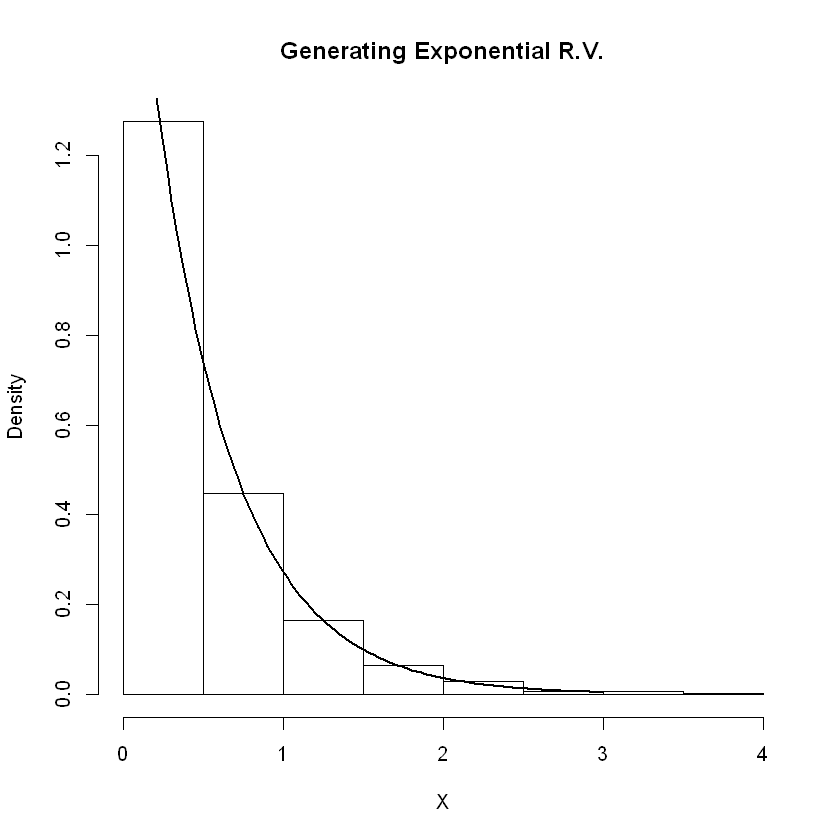

In [13]:
num.samples <-  1000
U           <-  runif(num.samples)
X           <- -log(1-U)/2

# plot
hist(X, freq=F, xlab='X', main='Generating Exponential R.V.')
curve(dexp(x, rate=2) , 0, 3, lwd=2, xlab = "", ylab = "", add = T)

## Pi Simulation

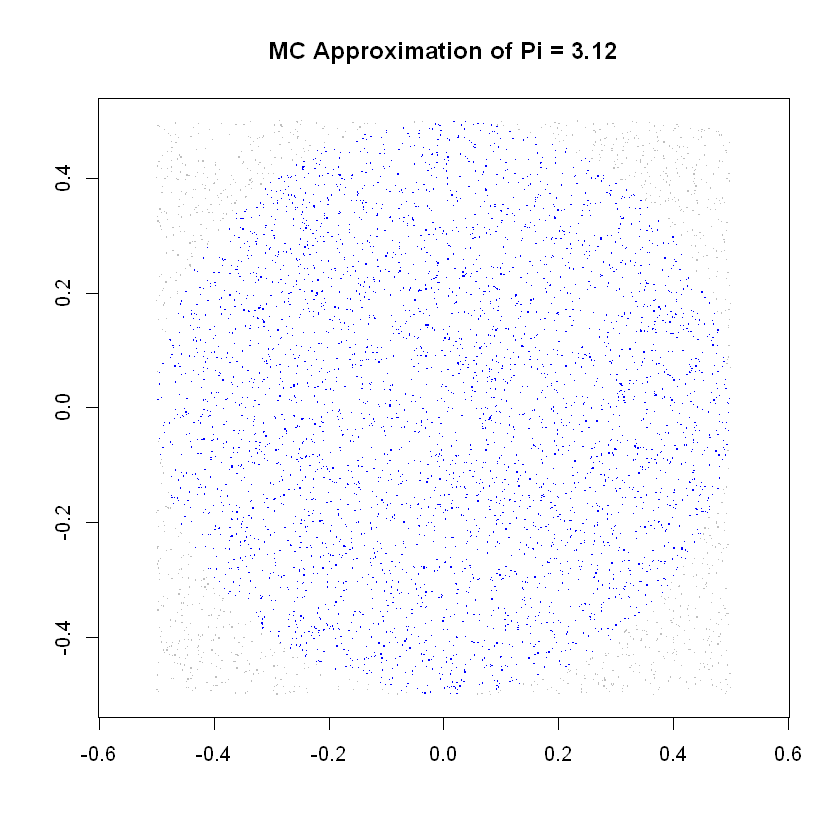

In [4]:
runs <- 5000

#runif samples from a uniform distribution
xs <- runif(runs,min=-0.5,max=0.5)
ys <- runif(runs,min=-0.5,max=0.5)

in.circle <- xs^2 + ys^2 <= 0.5^2
mc.pi <- (sum(in.circle)/runs)*4
# mc.pi <- (sum(380)/runs)*4

plot(xs,ys,pch='.',col=ifelse(in.circle,"blue","grey")
     , xlab=''
     , ylab=''
     , asp=1
     , main=paste("MC Approximation of Pi =",mc.pi)
    )


In [1]:
df <- data.frame(product = c('Oven', 'Microwave', 'Toaster'),
                 price = c(850, 300, 120)
                 )
print(df)

    product price
1      Oven   850
2 Microwave   300
3   Toaster   120
